**Pour voir le premier notebook sur l'analyse exploratoire et feature engineering cliquez ci-dessous**

[Voir le premier nootebook](./Fonkou_Symphor_1_notebook_160625.ipynb)

# ETAPE 3 & 4: MODELISATION ET AMELIORATION

In [35]:
#Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data_cible_encoded = pd.read_csv("data_cible_encoded.csv")
data_encoded = pd.read_csv("data_encoded.csv")
data = pd.read_csv("data.csv")

In [37]:
#Selection
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_validate, cross_val_score)
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error, classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

#Modèles
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
data_encoded_2 = data_encoded.copy()
data_cible_encoded_2 = data_cible_encoded.copy()

In [39]:
data_encoded_2.drop(columns=['id_employee', 'poste'], inplace=True)

In [40]:
data_encoded_2.head()

,age,revenu_mensuel,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,...,poste_Senior Manager,poste_Tech Lead,domaine_etude_Autre,domaine_etude_Entrepreunariat,domaine_etude_Infra & Cloud,domaine_etude_Marketing,domaine_etude_Ressources Humaines,domaine_etude_Transformation Digitale,heure_supplementaires_Non,heure_supplementaires_Oui
0,41,5993,8,8,6,4,0,0,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,49,5130,1,10,10,7,1,3,8,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,2090,6,7,0,0,0,3,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,2909,1,8,8,7,0,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,27,3468,1,6,2,2,1,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## I- Modélisation

### 1- DummyClassifier

In [41]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Variables
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# DummyClassifier (prédit toujours la classe majoritaire)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

# 📊 Résultats

# 🧮 Matrice de confusion 

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("📊 DummyClassifier Report (base naïve) :\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[289   0]
 [ 57   0]]
📊 DummyClassifier Report (base naïve) :

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       289
           1       0.00      0.00      0.00        57

    accuracy                           0.84       346
   macro avg       0.42      0.50      0.46       346
weighted avg       0.70      0.84      0.76       346



c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

📌 Interprétation :

Le classifieur a toujours prédit 0, car strategy="most_frequent" ⇒ il ignore complètement les variables explicatives et choisit toujours la classe la plus fréquente (ici : 0 = "n’a pas quitté l’entreprise").

Donc :

Il a bien prédit tous les non-départs.

Il a raté 100 % des vrais départs.

🎯 Conclusion :

Accuracy = 84 %, mais trompeuse : elle reflète uniquement la prédiction correcte de la classe majoritaire. Le modèle est inutile pour détecter les départs.

### 2- Régression logistique 

#### a) En train test split

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 3. Modèle
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# 5. Évaluation

print("=== 📘 Résultats sur le TRAIN ===")
#print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== 📕 Résultats sur le TEST ===")
#print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== 📘 Résultats sur le TRAIN ===
Confusion Matrix:
 [[670  22]
 [ 66  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       692
           1       0.76      0.52      0.62       137

    accuracy                           0.89       829
   macro avg       0.84      0.74      0.78       829
weighted avg       0.89      0.89      0.89       829


=== 📕 Résultats sur le TEST ===
Confusion Matrix:
 [[445  17]
 [ 54  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       462
           1       0.69      0.41      0.52        92

    accuracy                           0.87       554
   macro avg       0.79      0.69      0.72       554
weighted avg       0.86      0.87      0.86       554



c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**📘 Résultats sur le TRAIN (829 individus) :**

Accuracy = 0.87 : globalement très bon.

Recall pour classe 1 (départs) = 0.52 : sur 100 départs réels, il en détecte 52.

Precision pour classe 1 = 0.69 : sur 100 départs prédits, 69 sont vrais.

❗ Cela montre que sur le train, le modèle prédit peu de faux positifs, mais il rate encore presque la moitié des vrais départs.


**📕 Résultats sur le TEST (554 individus) :**

Accuracy = 0.87 : légèrement en baisse, ce qui est normal.

Recall pour classe 1 = 0.41 : il ne détecte que 41 % des départs → c’est faible.

Precision pour classe 1 = 0.69 : parmi les alertes de départ qu’il émet, 69 % sont justes.
                                                                                                                           
| Critère                  | Niveau actuel        | Interprétation                                                                  |
| ------------------------ | -------------------- | ------------------------------------------------------------------------------- |
| Accuracy                 | Haute (0.87)         | Le modèle classe bien globalement, mais c’est biaisé par la classe majoritaire. |
| Recall classe 1          | Faible (0.41 test)   | ❗ Le modèle **rate trop de départs**, ce qui est problématique.                 |
| Precision classe 1       | Moyenne-haute (0.69) | Quand il prédit un départ, il a plutôt raison.                                  |
| Recall classe 0 (restés) | Élevé (0.96)         | Il est très bon pour détecter ceux qui restent (classe majoritaire).            |


#### b) En validation croisée

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Initialisation
lr = LogisticRegression(solver='liblinear', random_state=42)
skf = StratifiedKFold(n_splits=15)

# 3. Stockage des résultats
all_y_true_test = []
all_y_pred_test = []
all_y_true_train = []
all_y_pred_train = []
recalls_test = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    lr.fit(X_train_fold, y_train_fold)
    
    # Prédictions
    y_pred_test = lr.predict(X_test_fold)
    y_pred_train = lr.predict(X_train_fold)

    # Stockage global
    all_y_true_test.extend(y_test_fold)
    all_y_pred_test.extend(y_pred_test)
    all_y_true_train.extend(y_train_fold)
    all_y_pred_train.extend(y_pred_train)

    # Évaluation du recall sur le test
    r = recall_score(y_test_fold, y_pred_test)
    recalls_test.append(r)


# 5. Rapport global - TRAIN
print("\n📘 Rapport global TRAIN (tous les folds confondus) :")
#print("Confusion Matrix (TRAIN) :")
print(confusion_matrix(all_y_true_train, all_y_pred_train))
#print("Classification Report (TRAIN) :")
print(classification_report(all_y_true_train, all_y_pred_train))

# 4. Rapport global - TEST
print("\n📕 Rapport global TEST (tous les folds confondus) :")
#print("Confusion Matrix (TEST) :")
print(confusion_matrix(all_y_true_test, all_y_pred_test))
#print("Classification Report (TEST) :")
print(classification_report(all_y_true_test, all_y_pred_test))

# 6. Statistiques de rappel (TEST)
mean_recall = np.mean(recalls_test)
std_recall = np.std(recalls_test)

print(f"\n📈 Rappel (classe 1) moyen sur les 5 folds (TEST) : {mean_recall:.4f} ± {std_recall:.4f}")



📘 Rapport global TRAIN (tous les folds confondus) :
[[15862   294]
 [ 1697  1509]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     16156
           1       0.84      0.47      0.60      3206

    accuracy                           0.90     19362
   macro avg       0.87      0.73      0.77     19362
weighted avg       0.89      0.90      0.88     19362


📕 Rapport global TEST (tous les folds confondus) :
[[1129   25]
 [ 129  100]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1154
           1       0.80      0.44      0.56       229

    accuracy                           0.89      1383
   macro avg       0.85      0.71      0.75      1383
weighted avg       0.88      0.89      0.87      1383


📈 Rappel (classe 1) moyen sur les 5 folds (TEST) : 0.4356 ± 0.1283


                                                                                                                           
|                          | Regréssion logistique| Regréssion logistique |
| ------------------------ | -------------------- | --------------------- |
| **Critère**              | **Train_test_split** | **Cross validate**    |
| Accuracy                 | 0.87                 | 0.89                  |
| Recall classe 1          | 0.41                 | 0.44                  |
| Precision classe 1       | 0.69                 | 0.80                  |
| Recall classe 0 (restés) | 0.96                 | 0.98                  |


✅ **Interprétations**

Le modèle performe légèrement mieux en validation croisée qu'en train test split, 
- On a un score globla de 0.89 contre 0.87
- De plus notre objectif vise beaucoup plus le rappel de la classe 1 en premier et sa precésion en second, ici, le rappel de la validation croisée est de 0.44 contre 0.41, ce qui veut dire que le modèle prédit mieux les départ 
- Avec une précision de 0.80 contre 0.69 celà signifie que pouçantage de départ réel sur les prédictions est également plus élevé en validation croisée qu'en train test split.

Mais ces scores peuvent être amélioré, nous allons tester d'autres modèles.



### 3- Random Forest Classifier

#### a) En train test split

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

# 3. Modèle avec max_depth
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # 
    random_state=42,
    class_weight='balanced'
)
rfc.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# 5. Évaluations

print("=== 📘 Résultats sur le TRAIN ===")
#print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("=== 📕 Résultats sur le TEST ===")
#print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== 📘 Résultats sur le TRAIN ===
Confusion Matrix:
 [[923   0]
 [  1 182]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       923
           1       1.00      0.99      1.00       183

    accuracy                           1.00      1106
   macro avg       1.00      1.00      1.00      1106
weighted avg       1.00      1.00      1.00      1106

=== 📕 Résultats sur le TEST ===
Confusion Matrix:
 [[224   7]
 [ 36  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       231
           1       0.59      0.22      0.32        46

    accuracy                           0.84       277
   macro avg       0.72      0.59      0.61       277
weighted avg       0.82      0.84      0.81       277



On observe un très faible rappel sur le test (0,22), nous allons vérifier le meilleur nombre d'arbre pour notre modèle

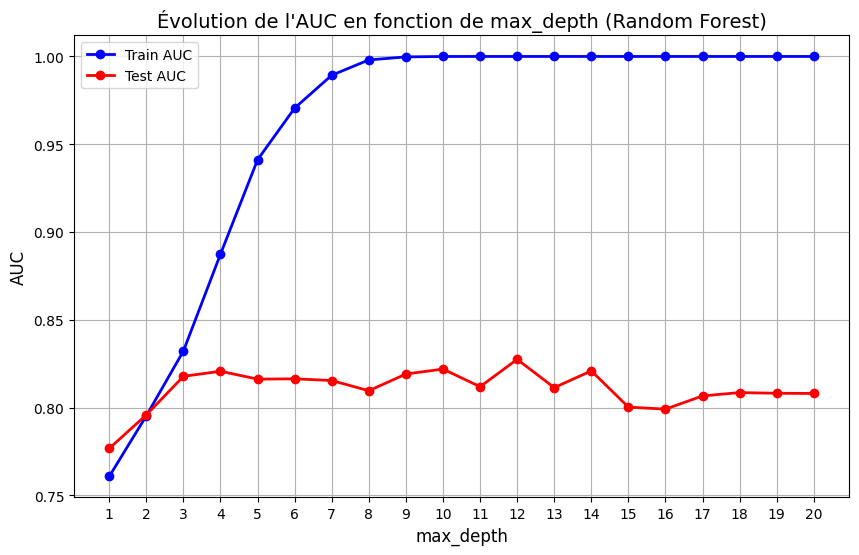

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Séparation des données
X = data_encoded_2  # Remplace par ton jeu de données
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']  # Remplace par ta cible

# 2. Liste des valeurs de max_depth à tester
max_depth_values = list(range(1, 21))

# 3. Initialisation des listes pour stocker les AUC de chaque fold
train_auc_scores = []
test_auc_scores = []

# 4. Boucle pour tester les différents max_depth
for max_depth in max_depth_values:
    # Séparation train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Création et entraînement du modèle RandomForest
    rfc = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42, class_weight='balanced')
    rfc.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement et de test
    y_train_pred_proba = rfc.predict_proba(X_train)[:, 1]
    y_test_pred_proba = rfc.predict_proba(X_test)[:, 1]
    
    # Calcul de l'AUC pour l'entraînement et le test
    train_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    test_auc_scores.append(roc_auc_score(y_test, y_test_pred_proba))

# 5. Tracer la courbe AUC pour l'entraînement et le test en fonction de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_auc_scores, marker='o', color='blue', linestyle='-', label='Train AUC', linewidth=2)
plt.plot(max_depth_values, test_auc_scores, marker='o', color='red', linestyle='-', label='Test AUC', linewidth=2)
plt.title('Évolution de l\'AUC en fonction de max_depth (Random Forest)', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()


Nous allons appliquer le nombre d'arbre 4 pour avoir les meilleurs scores

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 3. Modèle avec max_depth
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,  # 
    random_state=42,
    class_weight='balanced'
)
rfc.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# 5. Évaluations

print("=== 📘 Résultats sur le TRAIN ===")
#print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("=== 📕 Résultats sur le TEST ===")
#print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== 📘 Résultats sur le TRAIN ===
Confusion Matrix:
 [[809 114]
 [ 51 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       923
           1       0.54      0.72      0.62       183

    accuracy                           0.85      1106
   macro avg       0.74      0.80      0.76      1106
weighted avg       0.87      0.85      0.86      1106

=== 📕 Résultats sur le TEST ===
Confusion Matrix:
 [[194  37]
 [ 17  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       231
           1       0.44      0.63      0.52        46

    accuracy                           0.81       277
   macro avg       0.68      0.74      0.70       277
weighted avg       0.84      0.81      0.82       277



On constate une nette amélioration du rappel (0,63 contre 0,22 précédement) malgré une légère baisse de la précision 0,44 contre 0,59, mais on reste toujours globalement sur une accuracy élevé 0.81

#### b) En validation croisée

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Initialisation du modèle
rf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)  
skf = StratifiedKFold(n_splits=17)

# 3. Stockage global
all_y_true_test = []
all_y_pred_test = []
all_y_true_train = []
all_y_pred_train = []
recalls_test = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_pred_test = rf.predict(X_test_fold)
    y_pred_train = rf.predict(X_train_fold)

    # Stockage
    all_y_true_test.extend(y_test_fold)
    all_y_pred_test.extend(y_pred_test)
    all_y_true_train.extend(y_train_fold)
    all_y_pred_train.extend(y_pred_train)

    # Recall test (classe 1)
    recall = recall_score(y_test_fold, y_pred_test)
    recalls_test.append(recall)

# 5. Rapport global - TRAIN
print("\n📘 Rapport global TRAIN (tous les folds confondus) :")
#print("Confusion Matrix (TRAIN) :")
print(confusion_matrix(all_y_true_train, all_y_pred_train))
#print("Classification Report (TRAIN) :")
print(classification_report(all_y_true_train, all_y_pred_train))
recall_train = recall_score(all_y_true_train, all_y_pred_train)
#print(f"📈 Recall (classe 1 - TRAIN) global : {recall_train:.4f}")

# 6. Rapport global - TEST
print("\n📕 Rapport global TEST (tous les folds confondus) :")
#print("Confusion Matrix (TEST) :")
print(confusion_matrix(all_y_true_test, all_y_pred_test))
#print("Classification Report (TEST) :")
print(classification_report(all_y_true_test, all_y_pred_test))
mean_recall = np.mean(recalls_test)
std_recall = np.std(recalls_test)
print(f"📈 Recall (classe 1 - TEST) moyen sur 17 folds : {mean_recall:.4f} ± {std_recall:.4f}")



📘 Rapport global TRAIN (tous les folds confondus) :
[[18464     0]
 [    0  3664]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18464
           1       1.00      1.00      1.00      3664

    accuracy                           1.00     22128
   macro avg       1.00      1.00      1.00     22128
weighted avg       1.00      1.00      1.00     22128


📕 Rapport global TEST (tous les folds confondus) :
[[1134   20]
 [ 174   55]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1154
           1       0.73      0.24      0.36       229

    accuracy                           0.86      1383
   macro avg       0.80      0.61      0.64      1383
weighted avg       0.84      0.86      0.83      1383

📈 Recall (classe 1 - TEST) moyen sur 17 folds : 0.2405 ± 0.1209



Recall classe 1 (objectif) : 0.24

➤ Seulement 24% des départs ont été correctement détectés.

Precision classe 1 : 0.73

➤ Sur toutes les personnes prédites comme ayant quitté, 73% l’ont vraiment fait.

📌 Global :

Accuracy : 0.86

Macro avg F1-score (équilibre entre les classes) : 0.64

Weighted avg F1-score : 0.83


**🧠 Interprétation stratégique**

🎯 Objectif métier est de détecter les départs (classe 1) :

Le rappel (recall) est faible (0.24). Ça veut dire que le modèle manques plus du 3/4 des vrais départs.

Le modèle est très bon pour prédire les gens qui restent 98% (classe 0), mais pas fiable pour anticiper les départs.

**⚠️ Surapprentissage ?**

Le modèle apprend parfaitement le jeu d’entraînement (accuracy = 100%) → mais échoue à généraliser.

➤ Il mémorise plus qu’il ne généralise : overfitting probable.


### 4- Gradiant boosting classifier

#### a) Train test split

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Modèle Gradient Boosting avec max_depth
gbc = GradientBoostingClassifier(
    max_depth=15,  # Profondeur maximale des arbres 
    random_state=42, # Pour la reproductibilité
    n_estimators=200,  # Nombre d'arbres
)
gbc.fit(X_train, y_train)

# --- Évaluation sur les données d'entraînement ---
y_train_pred = gbc.predict(X_train)
print("📘 Résultats sur les données d'entraînement :")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# --- Évaluation sur les données de test ---
y_test_pred = gbc.predict(X_test)
print("\n📕 Résultats sur les données de test :")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


📘 Résultats sur les données d'entraînement :
Confusion Matrix:
 [[808   0]
 [  0 160]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00       160

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968


📕 Résultats sur les données de test :
Confusion Matrix:
 [[307  39]
 [ 49  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       346
           1       0.34      0.29      0.31        69

    accuracy                           0.79       415
   macro avg       0.60      0.59      0.59       415
weighted avg       0.78      0.79      0.78       415



|                       | Prédit : **0** (reste) | Prédit : **1** (démission) |
| --------------------- | ---------------------- | -------------------------- |
| **Réel : 0** (reste)  | 307 (✅ VN)            | 39 (❌ FP)                |
| **Réel : 1** (quitte) |  49 (❌ FN)            | 20 (✅ VP)                |


**🔍 Interprétation :**

VP = 20 : 20 personnes qui ont quitté ont été correctement identifiées → c’est ce qu'on recherche'.

FN = 49 : 49 personnes ont quitté mais le modèle a prédit qu’elles resteraient → ⚠️ c’est problématique car le modèle n'a pas anticipé leur départ.

FP = 39 : 39 personnes n’ont pas quitté, mais le modèle pensait qu’elles allaient partir → ce sont des faux signaux d’alerte.

VN = 307 : 307 personnes sont restées et le modèle l’a bien prédit → bien, mais moins critique pour l'objectif.


**🚨 Ce que cela signifie:**

L'objectif est de détecter les départs à venir (classe 1).
Mais ici, on a :
20 vrais départs détectés sur 69 vrais départs (20 + 49).

Donc un recall (rappel) sur la classe "part" très faible :20 / (20 + 49) = 0.29 (≈ 30 % seulement).


**⚠️Potentiel overfit:**

On constate un écart entre les résultats des donnée d'entrainnement (accuracy 1) et les données de test (0,79), le modèle apprend très bien mais n'arrive pas à généraliser correctement. On va refaire le même modèle avec validation croisée pour réduire essayer de réduire l'overfit.

#### b) Validation croisée

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# Initialisation des données
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)  # 👈 Hyperparamètres visibles

# Stockage global
all_y_true_train = []
all_y_pred_train = []
all_y_true_test = []
all_y_pred_test = []
recalls_test = []

# Validation croisée
for fold_num, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    gbc.fit(X_train, y_train)

    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)

    # Stockage
    all_y_true_train.extend(y_train)
    all_y_pred_train.extend(y_train_pred)
    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_test_pred)

    recalls_test.append(recall_score(y_test, y_test_pred))


# 📘 Résultats globaux TRAIN
print("\n📘 Résultats globaux TRAIN :")
#print("Confusion Matrix :")
print(confusion_matrix(all_y_true_train, all_y_pred_train))
#print("Classification Report :")
print(classification_report(all_y_true_train, all_y_pred_train))
recall_train = recall_score(all_y_true_train, all_y_pred_train)
#print(f"📈 Recall (classe 1 - TRAIN) global : {recall_train:.4f}")

# 📕 Résultats globaux TEST
print("\n📕 Résultats globaux TEST :")
#print("Confusion Matrix :")
print(confusion_matrix(all_y_true_test, all_y_pred_test))
#print("Classification Report :")
print(classification_report(all_y_true_test, all_y_pred_test))
mean_recall = np.mean(recalls_test)
std_recall = np.std(recalls_test)
print(f"📈 Recall (classe 1 - TEST) moyen sur 19 folds : {mean_recall:.4f} ± {std_recall:.4f}")



📘 Résultats globaux TRAIN :
[[10386     0]
 [    6  2055]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10386
           1       1.00      1.00      1.00      2061

    accuracy                           1.00     12447
   macro avg       1.00      1.00      1.00     12447
weighted avg       1.00      1.00      1.00     12447


📕 Résultats globaux TEST :
[[1105   49]
 [ 159   70]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1154
           1       0.59      0.31      0.40       229

    accuracy                           0.85      1383
   macro avg       0.73      0.63      0.66      1383
weighted avg       0.83      0.85      0.83      1383

📈 Recall (classe 1 - TEST) moyen sur 19 folds : 0.3061 ± 0.0725


### 5- XGBoost

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### a) Validation croisée

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# 1. Données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Paramètres
max_depth_values = range(2, 11)
skf = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

# 3. Stockage global
results = []

for depth in max_depth_values:
    recalls_train = []
    recalls_test = []

    all_y_true_train = []
    all_y_pred_train = []
    all_y_true_test = []
    all_y_pred_test = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              random_state=42, max_depth=depth, n_jobs=-1)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        all_y_true_train.extend(y_train)
        all_y_pred_train.extend(y_pred_train)
        all_y_true_test.extend(y_test)
        all_y_pred_test.extend(y_pred_test)

        recalls_train.append(recall_score(y_train, y_pred_train))
        recalls_test.append(recall_score(y_test, y_pred_test))

    results.append({
        'max_depth': depth,
        'recall_train_mean': np.mean(recalls_train),
        'recall_train_std': np.std(recalls_train),
        'recall_test_mean': np.mean(recalls_test),
        'recall_test_std': np.std(recalls_test),
        'y_true_train': all_y_true_train,
        'y_pred_train': all_y_pred_train,
        'y_true_test': all_y_true_test,
        'y_pred_test': all_y_pred_test
    })

# 4. Sélection du meilleur max_depth
best = max(results, key=lambda r: r['recall_test_mean'])

# 5. Affichage
#print(f"\n🏆 Meilleur max_depth : {best['max_depth']}")
#print(f"📈 Recall TEST moyen : {best['recall_test_mean']:.4f} ± {best['recall_test_std']:.4f}")
#print(f"📘 Recall TRAIN moyen : {best['recall_train_mean']:.4f} ± {best['recall_train_std']:.4f}")

# 6. Rapports globaux pour le meilleur modèle
print("=== 📘 Résultats globaux TRAIN ===")
#print("Confusion Matrix :")
print(confusion_matrix(best['y_true_train'], best['y_pred_train']))
#print("Classification Report :")
print(classification_report(best['y_true_train'], best['y_pred_train']))

print("=== 📕 Résultats globaux TEST ===")
#print("Confusion Matrix :")
print(confusion_matrix(best['y_true_test'], best['y_pred_test']))
#print("Classification Report :")
print(classification_report(best['y_true_test'], best['y_pred_test']))


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtu

=== 📘 Résultats globaux TRAIN ===
[[18360   104]
 [ 1243  2421]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18464
           1       0.96      0.66      0.78      3664

    accuracy                           0.94     22128
   macro avg       0.95      0.83      0.87     22128
weighted avg       0.94      0.94      0.93     22128

=== 📕 Résultats globaux TEST ===
[[1121   33]
 [ 138   91]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1154
           1       0.73      0.40      0.52       229

    accuracy                           0.88      1383
   macro avg       0.81      0.68      0.72      1383
weighted avg       0.86      0.88      0.86      1383



c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:47:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:47:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:47:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtu

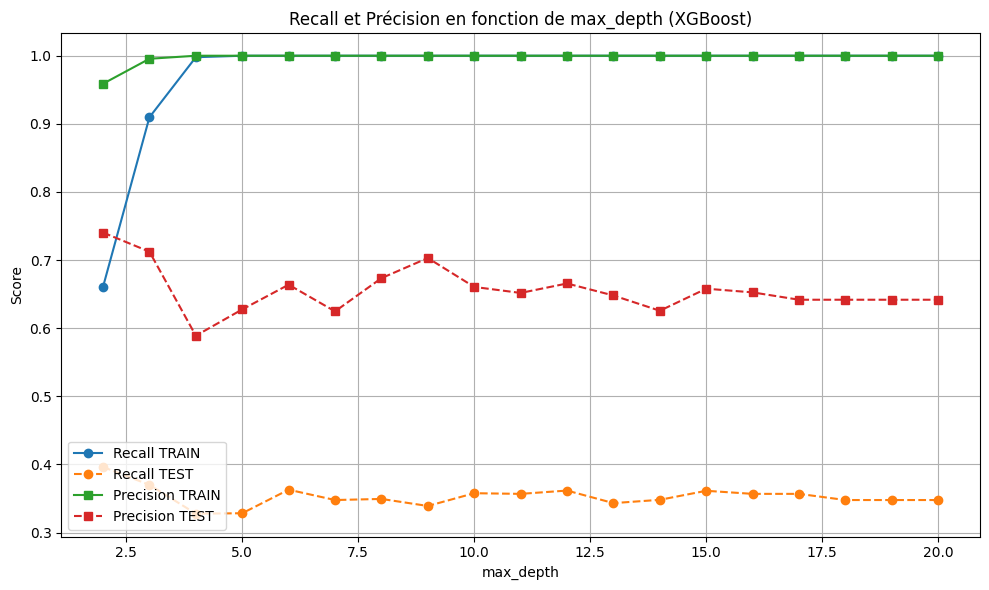

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# Paramètres
max_depth_values = range(2, 21)
skf = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

# Stockage pour les courbes
recalls_train = []
recalls_test = []
precisions_train = []
precisions_test = []

# Boucle sur max_depth
for depth in max_depth_values:
    recall_train_fold = []
    recall_test_fold = []
    precision_train_fold = []
    precision_test_fold = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              random_state=42, max_depth=depth, n_jobs=-1)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        recall_train_fold.append(recall_score(y_train, y_train_pred))
        recall_test_fold.append(recall_score(y_test, y_test_pred))
        precision_train_fold.append(precision_score(y_train, y_train_pred))
        precision_test_fold.append(precision_score(y_test, y_test_pred))

    recalls_train.append(np.mean(recall_train_fold))
    recalls_test.append(np.mean(recall_test_fold))
    precisions_train.append(np.mean(precision_train_fold))
    precisions_test.append(np.mean(precision_test_fold))

# 🎨 Tracer la courbe
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, recalls_train, label="Recall TRAIN", marker='o', linestyle='-')
plt.plot(max_depth_values, recalls_test, label="Recall TEST", marker='o', linestyle='--')
plt.plot(max_depth_values, precisions_train, label="Precision TRAIN", marker='s', linestyle='-')
plt.plot(max_depth_values, precisions_test, label="Precision TEST", marker='s', linestyle='--')

plt.xlabel("max_depth")
plt.ylabel("Score")
plt.title("Recall et Précision en fonction de max_depth (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### b) Train test split

In [53]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Paramètres
depth_range = range(2, 11)
n_iterations = 5  # pour réduire la variance avec plusieurs splits

# 3. Résultats
results = []

for depth in depth_range:
    recalls_train = []
    recalls_test = []

    for i in range(n_iterations):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, stratify=y, test_size=0.22, random_state=42 + i
        )

        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                            max_depth=depth, random_state=42 + i, n_jobs=-1)
        xgb.fit(X_train, y_train)

        y_train_pred = xgb.predict(X_train)
        y_test_pred = xgb.predict(X_test)

        recalls_train.append(recall_score(y_train, y_train_pred))
        recalls_test.append(recall_score(y_test, y_test_pred))

    results.append({
        'max_depth': depth,
        'recall_train_mean': np.mean(recalls_train),
        'recall_train_std': np.std(recalls_train),
        'recall_test_mean': np.mean(recalls_test),
        'recall_test_std': np.std(recalls_test),
    })
'''
# 4. Affichage des résultats
print("📊 Résultats par max_depth :")
for r in results:
    print(f"max_depth = {r['max_depth']} | "
          f"Recall TRAIN = {r['recall_train_mean']:.4f} ± {r['recall_train_std']:.4f} | "
          f"Recall TEST = {r['recall_test_mean']:.4f} ± {r['recall_test_std']:.4f}")
'''
# 5. Sélection du meilleur hyperparamètre
best = max(results, key=lambda r: r['recall_test_mean'])

print(f"\n🏆 Meilleur max_depth : {best['max_depth']}")
print(f"📘 Recall TRAIN moyen : {best['recall_train_mean']:.4f} ± {best['recall_train_std']:.4f}")
print(f"📕 Recall TEST moyen : {best['recall_test_mean']:.4f} ± {best['recall_test_std']:.4f}")

# 6. Réentraîner le meilleur modèle pour afficher les rapports
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.22, random_state=42
)

best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                           max_depth=best['max_depth'], random_state=42)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Rapport TRAIN
print("\n=== 📘 Rapport TRAIN ===")
print("Confusion Matrix :")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report :")
print(classification_report(y_train, y_train_pred))

# Rapport TEST
print("\n=== 📕 Rapport TEST ===")
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test, y_test_pred))


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtu


🏆 Meilleur max_depth : 6
📘 Recall TRAIN moyen : 1.0000 ± 0.0000
📕 Recall TEST moyen : 0.3961 ± 0.0940


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 📘 Rapport TRAIN ===
Confusion Matrix :
[[900   0]
 [  0 178]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078


=== 📕 Rapport TEST ===
Confusion Matrix :
[[243  11]
 [ 34  17]]
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       254
           1       0.61      0.33      0.43        51

    accuracy                           0.85       305
   macro avg       0.74      0.65      0.67       305
weighted avg       0.83      0.85      0.83       305



### 6- Premiers résultats globaux

|                          | Regréssion logistique| Random Forest         | Gradiant boosting    | XGBoost              |
| ------------------------ | -------------------- | --------------------- | -------------------- | ---------------------|
| **Critère**              | **Train_test_split** | **Train_test_split**  | **Train_test_split** | **Train_test_split** |
| Accuracy                 | 0.87                 | 0.81                  | 0.79                 | 0.85                 |
| Recall classe 1          | 0.49                 | 0.63                  | 0.29                 | 0.33                 |
| Precision classe 1       | 0.61                 | 0.44                  | 0.34                 | 0.61                 |
| Recall classe 0 (restés) | 0.96                 | 0.84                  | 0.89                 | 0.96                 |
|                          | **Cross validate**   | **Cross validate**    | **Cross validate**   | **Cross validate**   |
| Accuracy                 | 0.89                 | 0.86                  | 0.85                 | 0.88                 |
| Recall classe 1          | 0.44                 | 0.24                  | 0.31                 | 0.40                 |
| Precision classe 1       | 0.80                 | 0.73                  | 0.59                 | 0.73                 |
| Recall classe 0 (restés) | 0.98                 | 0.98                  | 0.96                 | 0.97                 |

1. Priorité  : Maximiser le Recall (Classe 1 - Départs) et la précision (Classe 1 - Éviter les Faux Positifs)

Random Forest (Train-Test Split) a le meilleur Recall (0.63), mais il chute en Cross-Validation (0.24) → risque de surapprentissage.

Régression Logistique et XGBoost ont un Recall stable entre 0.40 et 0.49 en Cross-Validation → meilleure généralisation.

Gradient Boosting est trop faible (Recall ~0.30) → inadapté.

✅ Meilleur compromis pour le moment : la regrésion logistique 
→ Plus stable que Random Forest et meilleur que Gradient Boosting et XGBoosting en précision et rappel


## II- Amélioration du modèle 

### 1- Création de nouvelles features 

Pour le feature engineering, nous allons les répartir en trois grands groupes comme ci-dessous: signaux de départ (risque de démission), raison potentielle de départ et features décelés sur les composantes principales 

🔹 Signaux de départ (risque de démission)

- Age par rapport au nombre d'expérience précédente : plus il est jeune avec plusieurs expérience, plus il y'a des chances qu'il démissionne
- Distance domicile travail par rapport au nombre d'année d'expérience : plus il est loin avec peu d'expérience plus il peut démissionner
- Nbre de participation pee : plus c'est faible plus il peut ne pas se projeter dans l'entreprise 
- Nbre d'année depuis la dernière promo par rapport au nombre d'année dans l'entreprise : 
- Tous les éléments liés aux liens de satisfaction, note évaluation
- Note évaluation précédente par rapport note évaluation actuelle: si inférieure à 1 alors signale possible de démission
- Écart entre âge et années d'expérience: Peut révéler des profils surqualifiés ou reconvertis tardivement
- Score d’engagement (synthétique): Moyenne pondérée de participation PEE, nb formations, satisfaction, etc: plus ce score sera faible, plus il montrera des signe de désengagement de l'employé, risque de démission
- satisfaction employé nature travail par rapport à la note évaluation actuelle 


🔸 Raison potentielle de départ

- Salaire par rapport au nombre de poste occupé : si le salaire n'a pas beaucoup augmenté malgré plusieurs poste occupé, il peut démissionner
- Salaire par rapport à l'augmentation : plus il a une faible augmentation plus il y'a des chances de départ
- Salaire par rapport aux salaire des collègues du même poste: si faible, alors il a une raison de démissioner 
- Nombre d'année d'expérience par rapport aux évolutions en poste : plus il a duré sur un même poste plus il peut partir
- Heure supplémentaire par rapport à l'augmentation de salaire
- Heure supplémentaire par rapport au niveau_hierachique_poste: plus il fait des heures supplémentaire sur un bas poste plus il a des chances de démissionner
- Heure supplémentaire par rapport à l'ancienneté sur le poste: même logique
- Heure supplémentaire par rapport au taux d'augmentation : un salarié qui fait des heures supplémentaire s'attend à une augmentation
- Nombre de formation par rapport au nombre d'années dans l'entreprise : un salarié très ancien mais peu formé peut perdre la motivation et démissionner

Features décelées sur les compostantes principales:

- Salaire faible 
- Poste à risque : poste liés au commerce ou marketing par rapport au salaire faible
 


#### a) Signaux de départ

In [54]:

# 🔹 Signaux de départ (risque de démission)

# 1. Âge par rapport au nombre d'expérience précédente
data_encoded_2['ratio_experience_age'] = data_encoded_2['nombre_experiences_precedentes'] / (data_encoded_2['age'] + 1)

# 2. Distance domicile-travail par rapport au nombre d'années d'expérience
data_encoded_2['ratio_distance_experience'] = data_encoded_2['distance_domicile_travail'] / (data_encoded_2['annee_experience_totale'] + 1)

# 3. Nbre de participation PEE (aucune transformation, mais potentiellement utilisé tel quel)
# Déjà présent sous data_encoded_2['nombre_participation_pee']

# 4. Nbre d'années depuis la dernière promotion / années dans l'entreprise
data_encoded_2['annees_depuis_promo_ratio'] = data_encoded_2['annees_depuis_la_derniere_promotion'] / (data_encoded_2['annees_dans_l_entreprise'] + 1)

# 5. Moyenne des satisfactions (environnement, travail, équipe, équilibre pro/perso)
data_encoded_2['satisfaction_moyenne'] = data_encoded_2[[
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso'
]].mean(axis=1)

# 6. Écart note évaluation précédente vs. actuelle
data_encoded_2['delta_note_evaluation'] = data_encoded_2['note_evaluation_actuelle'] - data_encoded_2['note_evaluation_precedente']

# 7. Écart entre âge et années d'expérience
data_encoded_2['ecart_age_experience'] = data_encoded_2['age'] - data_encoded_2['annee_experience_totale']

# 8. Score d'engagement (participation PEE, formations suivies, satisfaction moyenne)
data_encoded_2['score_engagement'] = (
    data_encoded_2['nombre_participation_pee'] * 0.3 +
    data_encoded_2['nb_formations_suivies'] * 0.3 +
    data_encoded_2['satisfaction_moyenne'] * 0.4
)

# 9. Satisfaction nature du travail par rapport à la note évaluation actuelle
data_encoded_2['ratio_satisfaction_travail_eval'] = data_encoded_2['satisfaction_employee_nature_travail'] / (data_encoded_2['note_evaluation_actuelle'] + 1)


#### b) Raison potentielle de départ

✅ Commentaires :

Ces indicateurs permettent de quantifier un déséquilibre ou une injustice perçue (salaire, reconnaissance, formation).

On pourra analyser leur distribution entre les employés qui ont quitté l’entreprise (a_quitte_l_entreprise == Oui) et les autres.

In [55]:

# 🔹 Revenu par nombre d’expériences précédentes
data_encoded_2['revenu_par_poste'] = data_encoded_2['revenu_mensuel'] / (data_encoded_2['nombre_experiences_precedentes'] + 1)

# 🔹 Revenu par taux d'augmentation déjà présent
data_encoded_2['taux_augmentation'] = data_encoded_2['augmentation_salaire_precedent(%)'] / data_encoded_2['revenu_mensuel']

# 🔹 Écart au revenu moyen par poste
#   🔸 Calcul du revenu moyen par poste
revenu_moyen_par_poste = data.groupby("poste")["revenu_mensuel"].mean()

#   🔸 Création de la colonne écart au revenu moyen
data_encoded_2["ecart_revenu_moyen_poste"] = data.apply(
    lambda row: row["revenu_mensuel"] - revenu_moyen_par_poste[row["poste"]],
    axis=1)

# 🔹 Expérience stagnante
data_encoded_2['experience_stagnee'] = data_encoded_2['annee_experience_totale'] - data_encoded_2['nombre_experiences_precedentes']

# 🔹 Heure supp x taux d’augmentation
data_encoded_2['heure_supp_par_taux_augmentation'] = data_encoded_2['heure_supplementaires_Oui'] * data_encoded_2['taux_augmentation']

# 🔹 Heure supp / niveau hiérarchique (encoded déjà présent)
data_encoded_2['heure_supp_niveau_hierarchique'] = data_encoded_2['heure_supplementaires_Oui'] / (data_encoded_2['niveau_hierarchique_poste'] + 1)

# 🔹 Heure supp x ancienneté sur poste
data_encoded_2['heure_supp_anciennete_poste'] = data_encoded_2['heure_supplementaires_Oui'] * data_encoded_2['annees_dans_le_poste_actuel']

# 🔹 Heures supp - taux d’augmentation
data_encoded_2['effort_vs_gain'] = data_encoded_2['heure_supplementaires_Oui'] - data_encoded_2['taux_augmentation']

# 🔹 Formations / ancienneté
data_encoded_2['formations_par_anciennete'] = data_encoded_2['nb_formations_suivies'] / (data_encoded_2['annees_dans_l_entreprise'] + 1)



#### c) Features issues des composantes principales

In [56]:
# revenu_mensuel bas
data_encoded_2['revenu_bas'] = (data_encoded_2['revenu_mensuel'] < data_encoded_2['revenu_mensuel'].median()).astype(int)

# poste à département consulting
data_encoded_2['departement_consulting'] = (data['departement'] == 'Consulting').astype(int)

# poste à département commercial 
data_encoded_2['departement_commercial'] = (data['departement'] == 'Commercial').astype(int)

# poste à domaine d'étude marketing
data_encoded_2['domaine_etude_marketing'] = (data['domaine_etude'] == 'Marketing').astype(int)

# poste à département commercial ou marketing 
data_encoded_2['departement_commercial_marketing'] = ((data_encoded_2['departement_commercial'] == 1) | (data_encoded_2['domaine_etude_marketing'] == 1)).astype(int)

# profil à risque : poste commercial ou marketing et faible revenu
data_encoded_2['profil_risque_renforce'] = ((data_encoded_2['departement_commercial'] == 1) | (data_encoded_2['domaine_etude_marketing'] == 1) & (data_encoded_2['revenu_bas'] == 1) ).astype(int)

### 2- Vérifications des corrélations des features

In [57]:
data_encoded_2.shape

(1383, 72)

#### a) Matrice de corrélation

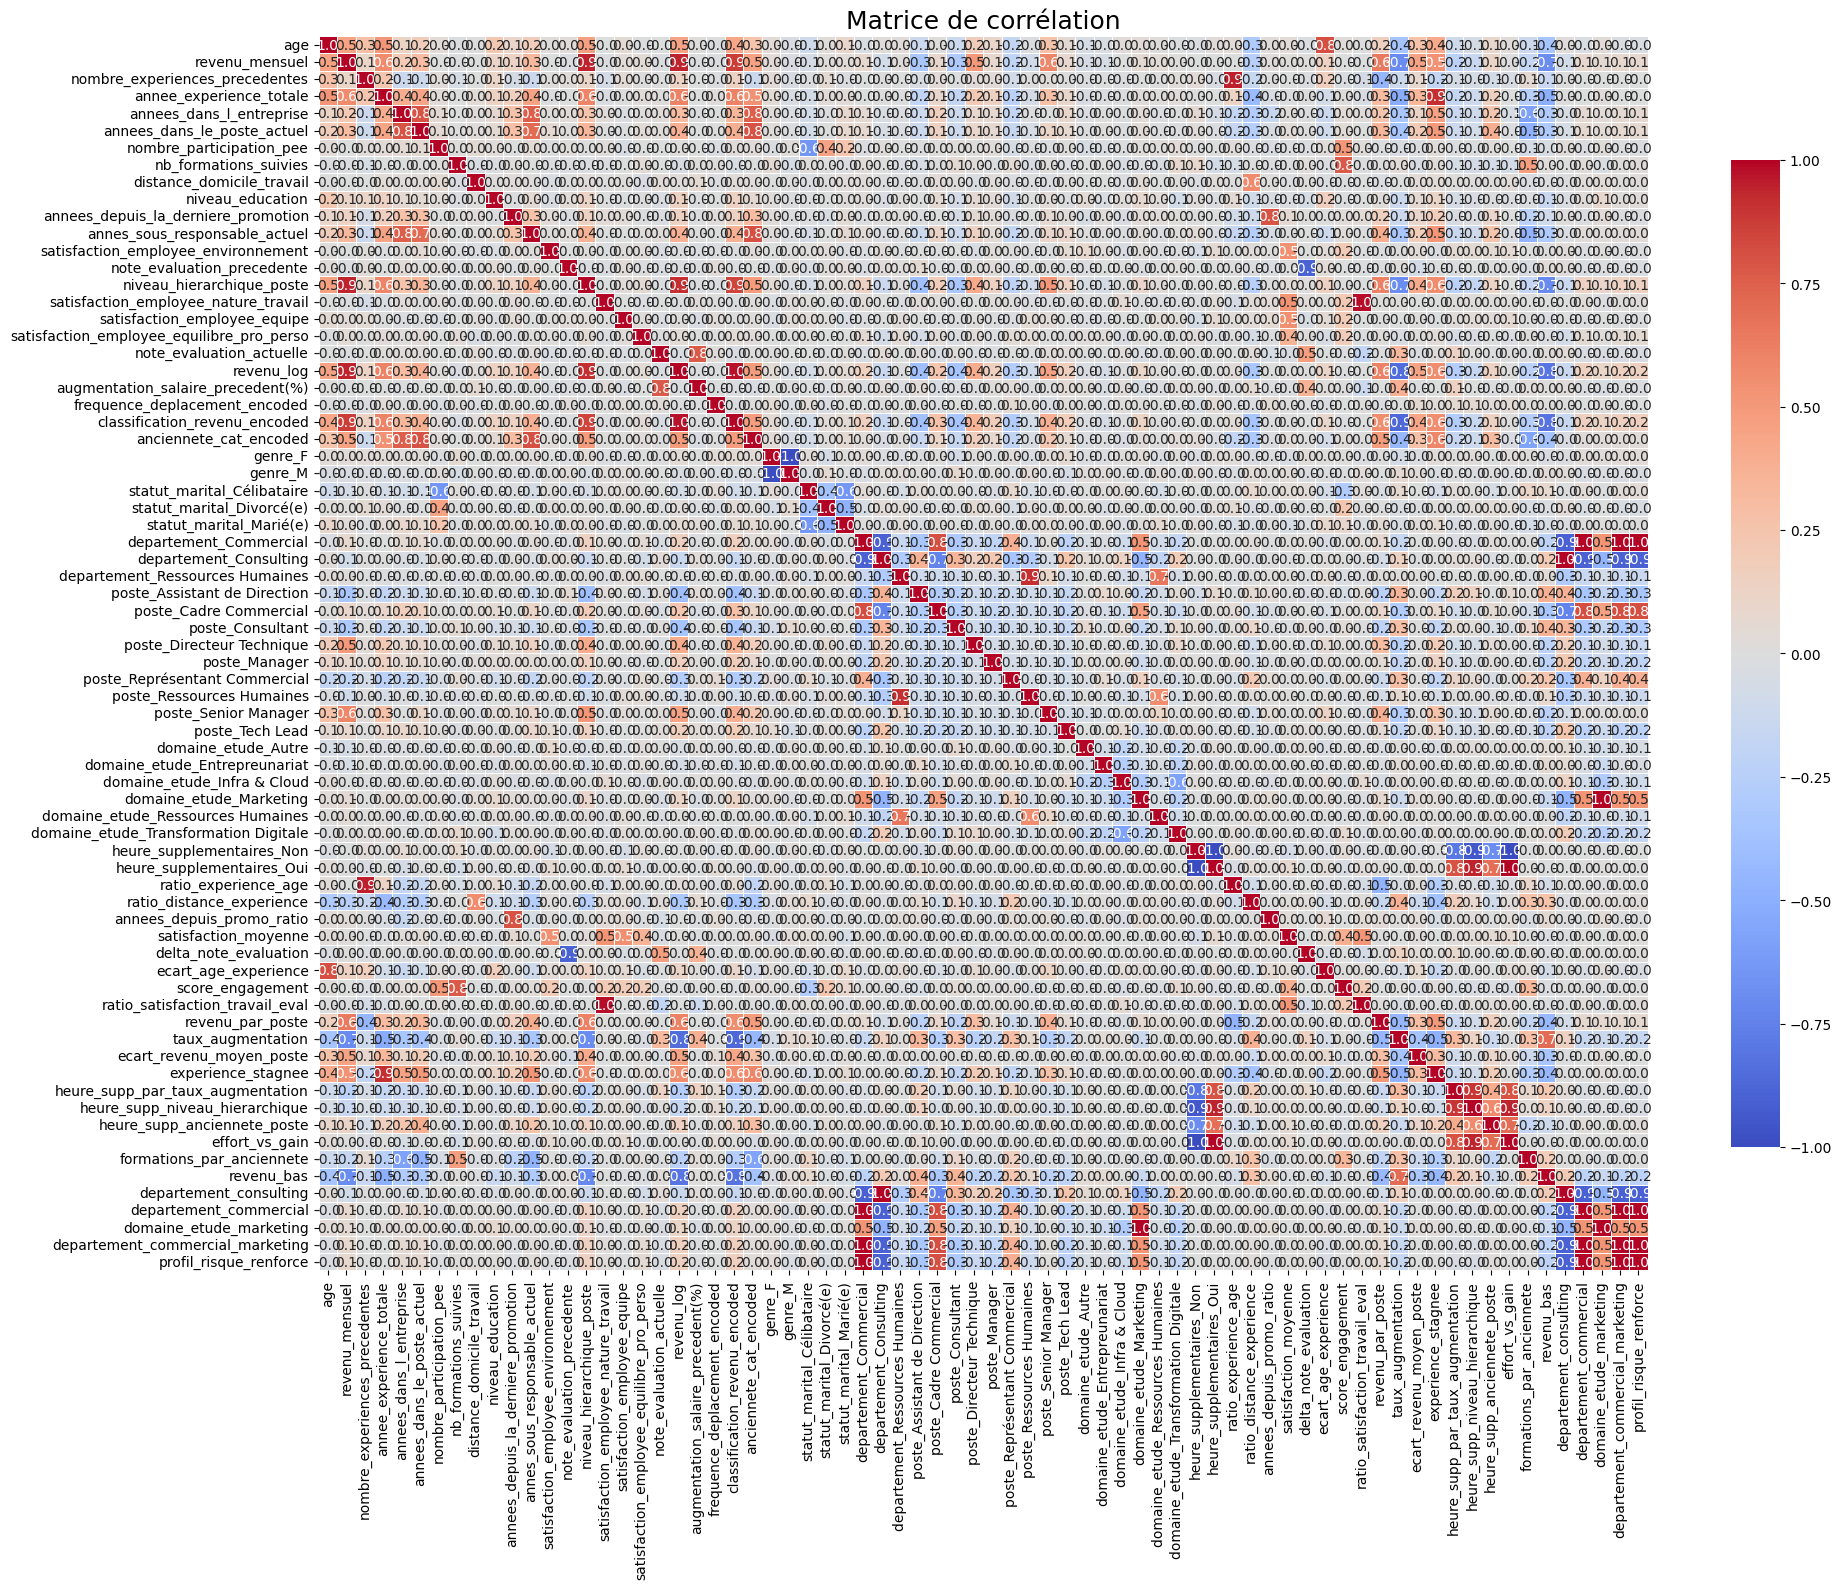

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcul de la matrice de corrélation
correlation_matrix = data_encoded_2.corr(numeric_only=True)

# 2. Affichage de la heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', center=0,
            cbar_kws={"shrink": .8}, linewidths=.5)

plt.title("Matrice de corrélation", fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### b) Features à fortes corrélations

In [59]:
# Seuil de corrélation
threshold = 0.8

# Extraction des paires fortement corrélées
high_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs['Correlation']) >= threshold)]

print("🔍 Paires de variables fortement corrélées :")
print(high_corr_pairs.sort_values(by='Correlation', ascending=False))


🔍 Paires de variables fortement corrélées :
                                 Feature 1                         Feature 2  \
2552                departement_commercial            profil_risque_renforce   
1693                departement_Commercial  departement_commercial_marketing   
1694                departement_Commercial            profil_risque_renforce   
1731                departement_Consulting            departement_consulting   
1691                departement_Commercial            departement_commercial   
2202               domaine_etude_Marketing           domaine_etude_marketing   
2551                departement_commercial  departement_commercial_marketing   
2555      departement_commercial_marketing            profil_risque_renforce   
2295             heure_supplementaires_Oui                    effort_vs_gain   
1000  satisfaction_employee_nature_travail   ratio_satisfaction_travail_eval   
1180                            revenu_log     classification_revenu_encoded

#### c) Supréssion d'une feature de chaque paires fortement correlée

In [60]:
col_high_corr = high_corr_pairs['Feature 1'].tolist() + high_corr_pairs['Feature 2'].tolist()
col_high_corr = list(set(col_high_corr))  # Supprimer les doublons

In [61]:
col_to_del = ['revenu_mensuel', 'classification_revenu_encoded', 'niveau_hierarchique_poste',  'poste_Ressources Humaines',
              'poste_Cadre Commercial', 'annes_sous_responsable_actuel', 'departement_Consulting', 'genre_M', 'heure_supplementaires_Non']

In [62]:
data_encoded_2.drop(columns=col_to_del, inplace=True)

In [63]:
data_encoded_2.shape

(1383, 63)

### 3- Application du features engineering sur les modèles

#### A- Regréssion logistique

##### a) Train_test_split

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 3. Modèle
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# 5. Évaluation

print("=== 📘 Résultats sur le TRAIN ===")
#print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== 📕 Résultats sur le TEST ===")
#print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== 📘 Résultats sur le TRAIN ===
Confusion Matrix:
 [[672  20]
 [ 70  67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       692
           1       0.77      0.49      0.60       137

    accuracy                           0.89       829
   macro avg       0.84      0.73      0.77       829
weighted avg       0.88      0.89      0.88       829


=== 📕 Résultats sur le TEST ===
Confusion Matrix:
 [[448  14]
 [ 59  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       462
           1       0.70      0.36      0.47        92

    accuracy                           0.87       554
   macro avg       0.79      0.66      0.70       554
weighted avg       0.85      0.87      0.85       554



c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### b) Validation croisée

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Initialisation
lr = LogisticRegression(solver='liblinear', random_state=42)
skf = StratifiedKFold(n_splits=15)

# 3. Stockage des résultats
all_y_true_test = []
all_y_pred_test = []
all_y_true_train = []
all_y_pred_train = []
recalls_test = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    lr.fit(X_train_fold, y_train_fold)
    
    # Prédictions
    y_pred_test = lr.predict(X_test_fold)
    y_pred_train = lr.predict(X_train_fold)

    # Stockage global
    all_y_true_test.extend(y_test_fold)
    all_y_pred_test.extend(y_pred_test)
    all_y_true_train.extend(y_train_fold)
    all_y_pred_train.extend(y_pred_train)

    # Évaluation du recall sur le test
    r = recall_score(y_test_fold, y_pred_test)
    recalls_test.append(r)


# 5. Rapport global - TRAIN
print("\n📘 Rapport global TRAIN (tous les folds confondus) :")
#print("Confusion Matrix (TRAIN) :")
print(confusion_matrix(all_y_true_train, all_y_pred_train))
#print("Classification Report (TRAIN) :")
print(classification_report(all_y_true_train, all_y_pred_train))

# 4. Rapport global - TEST
print("\n📕 Rapport global TEST (tous les folds confondus) :")
#print("Confusion Matrix (TEST) :")
print(confusion_matrix(all_y_true_test, all_y_pred_test))
#print("Classification Report (TEST) :")
print(classification_report(all_y_true_test, all_y_pred_test))

# 6. Statistiques de rappel (TEST)
mean_recall = np.mean(recalls_test)
std_recall = np.std(recalls_test)

print(f"\n📈 Rappel (classe 1) moyen sur les 5 folds (TEST) : {mean_recall:.4f} ± {std_recall:.4f}")



📘 Rapport global TRAIN (tous les folds confondus) :
[[15805   351]
 [ 1759  1447]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     16156
           1       0.80      0.45      0.58      3206

    accuracy                           0.89     19362
   macro avg       0.85      0.71      0.76     19362
weighted avg       0.88      0.89      0.88     19362


📕 Rapport global TEST (tous les folds confondus) :
[[1119   35]
 [ 134   95]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1154
           1       0.73      0.41      0.53       229

    accuracy                           0.88      1383
   macro avg       0.81      0.69      0.73      1383
weighted avg       0.87      0.88      0.86      1383


📈 Rappel (classe 1) moyen sur les 5 folds (TEST) : 0.4147 ± 0.0929


#### B- Random Forest

##### a) Train_test_split

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 3. Modèle avec max_depth
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,  # 
    random_state=42,
    class_weight='balanced'
)
rfc.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# 5. Évaluations

print("=== 📘 Résultats sur le TRAIN ===")
#print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("=== 📕 Résultats sur le TEST ===")
#print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== 📘 Résultats sur le TRAIN ===
Confusion Matrix:
 [[836  87]
 [ 46 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       923
           1       0.61      0.75      0.67       183

    accuracy                           0.88      1106
   macro avg       0.78      0.83      0.80      1106
weighted avg       0.89      0.88      0.88      1106

=== 📕 Résultats sur le TEST ===
Confusion Matrix:
 [[195  36]
 [ 18  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       231
           1       0.44      0.61      0.51        46

    accuracy                           0.81       277
   macro avg       0.68      0.73      0.69       277
weighted avg       0.84      0.81      0.82       277



##### b) Validation croisée

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Initialisation du modèle
rf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)  
skf = StratifiedKFold(n_splits=17)

# 3. Stockage global
all_y_true_test = []
all_y_pred_test = []
all_y_true_train = []
all_y_pred_train = []
recalls_test = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_pred_test = rf.predict(X_test_fold)
    y_pred_train = rf.predict(X_train_fold)

    # Stockage
    all_y_true_test.extend(y_test_fold)
    all_y_pred_test.extend(y_pred_test)
    all_y_true_train.extend(y_train_fold)
    all_y_pred_train.extend(y_pred_train)

    # Recall test (classe 1)
    recall = recall_score(y_test_fold, y_pred_test)
    recalls_test.append(recall)

# 5. Rapport global - TRAIN
print("\n📘 Rapport global TRAIN (tous les folds confondus) :")
#print("Confusion Matrix (TRAIN) :")
print(confusion_matrix(all_y_true_train, all_y_pred_train))
#print("Classification Report (TRAIN) :")
print(classification_report(all_y_true_train, all_y_pred_train))
recall_train = recall_score(all_y_true_train, all_y_pred_train)
#print(f"📈 Recall (classe 1 - TRAIN) global : {recall_train:.4f}")

# 6. Rapport global - TEST
print("\n📕 Rapport global TEST (tous les folds confondus) :")
#print("Confusion Matrix (TEST) :")
print(confusion_matrix(all_y_true_test, all_y_pred_test))
#print("Classification Report (TEST) :")
print(classification_report(all_y_true_test, all_y_pred_test))
mean_recall = np.mean(recalls_test)
std_recall = np.std(recalls_test)
print(f"📈 Recall (classe 1 - TEST) moyen sur 17 folds : {mean_recall:.4f} ± {std_recall:.4f}")



📘 Rapport global TRAIN (tous les folds confondus) :
[[18464     0]
 [    0  3664]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18464
           1       1.00      1.00      1.00      3664

    accuracy                           1.00     22128
   macro avg       1.00      1.00      1.00     22128
weighted avg       1.00      1.00      1.00     22128


📕 Rapport global TEST (tous les folds confondus) :
[[1133   21]
 [ 171   58]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1154
           1       0.73      0.25      0.38       229

    accuracy                           0.86      1383
   macro avg       0.80      0.62      0.65      1383
weighted avg       0.85      0.86      0.83      1383

📈 Recall (classe 1 - TEST) moyen sur 17 folds : 0.2534 ± 0.1147


#### C- Gradiant boosting 

##### a) Train_test_split

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Modèle Gradient Boosting avec max_depth
gbc = GradientBoostingClassifier(
    max_depth=15,  # Profondeur maximale des arbres 
    random_state=42, # Pour la reproductibilité
    n_estimators=200,  # Nombre d'arbres
)
gbc.fit(X_train, y_train)

# --- Évaluation sur les données d'entraînement ---
y_train_pred = gbc.predict(X_train)
print("📘 Résultats sur les données d'entraînement :")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# --- Évaluation sur les données de test ---
y_test_pred = gbc.predict(X_test)
print("\n📕 Résultats sur les données de test :")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


📘 Résultats sur les données d'entraînement :
Confusion Matrix:
 [[808   0]
 [  0 160]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00       160

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968


📕 Résultats sur les données de test :
Confusion Matrix:
 [[307  39]
 [ 46  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       346
           1       0.37      0.33      0.35        69

    accuracy                           0.80       415
   macro avg       0.62      0.61      0.61       415
weighted avg       0.79      0.80      0.79       415



##### b) Validation croisée

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# Initialisation des données
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)  # 👈 Hyperparamètres visibles

# Stockage global
all_y_true_train = []
all_y_pred_train = []
all_y_true_test = []
all_y_pred_test = []
recalls_test = []

# Validation croisée
for fold_num, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    gbc.fit(X_train, y_train)

    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)

    # Stockage
    all_y_true_train.extend(y_train)
    all_y_pred_train.extend(y_train_pred)
    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_test_pred)

    recalls_test.append(recall_score(y_test, y_test_pred))


# 📘 Résultats globaux TRAIN
print("\n📘 Résultats globaux TRAIN :")
#print("Confusion Matrix :")
print(confusion_matrix(all_y_true_train, all_y_pred_train))
#print("Classification Report :")
print(classification_report(all_y_true_train, all_y_pred_train))
recall_train = recall_score(all_y_true_train, all_y_pred_train)
#print(f"📈 Recall (classe 1 - TRAIN) global : {recall_train:.4f}")

# 📕 Résultats globaux TEST
print("\n📕 Résultats globaux TEST :")
#print("Confusion Matrix :")
print(confusion_matrix(all_y_true_test, all_y_pred_test))
#print("Classification Report :")
print(classification_report(all_y_true_test, all_y_pred_test))
mean_recall = np.mean(recalls_test)
std_recall = np.std(recalls_test)
print(f"📈 Recall (classe 1 - TEST) moyen sur 19 folds : {mean_recall:.4f} ± {std_recall:.4f}")



📘 Résultats globaux TRAIN :
[[10386     0]
 [    6  2055]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10386
           1       1.00      1.00      1.00      2061

    accuracy                           1.00     12447
   macro avg       1.00      1.00      1.00     12447
weighted avg       1.00      1.00      1.00     12447


📕 Résultats globaux TEST :
[[1106   48]
 [ 163   66]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1154
           1       0.58      0.29      0.38       229

    accuracy                           0.85      1383
   macro avg       0.73      0.62      0.65      1383
weighted avg       0.82      0.85      0.83      1383

📈 Recall (classe 1 - TEST) moyen sur 19 folds : 0.2887 ± 0.0652


#### D- XGBoost

##### a) Train_test_split

In [70]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Paramètres
depth_range = range(2, 11)
n_iterations = 5  # pour réduire la variance avec plusieurs splits

# 3. Résultats
results = []

for depth in depth_range:
    recalls_train = []
    recalls_test = []

    for i in range(n_iterations):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, stratify=y, test_size=0.22, random_state=42 + i
        )

        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                            max_depth=depth, random_state=42 + i, n_jobs=-1)
        xgb.fit(X_train, y_train)

        y_train_pred = xgb.predict(X_train)
        y_test_pred = xgb.predict(X_test)

        recalls_train.append(recall_score(y_train, y_train_pred))
        recalls_test.append(recall_score(y_test, y_test_pred))

    results.append({
        'max_depth': depth,
        'recall_train_mean': np.mean(recalls_train),
        'recall_train_std': np.std(recalls_train),
        'recall_test_mean': np.mean(recalls_test),
        'recall_test_std': np.std(recalls_test),
    })
'''
# 4. Affichage des résultats
print("📊 Résultats par max_depth :")
for r in results:
    print(f"max_depth = {r['max_depth']} | "
          f"Recall TRAIN = {r['recall_train_mean']:.4f} ± {r['recall_train_std']:.4f} | "
          f"Recall TEST = {r['recall_test_mean']:.4f} ± {r['recall_test_std']:.4f}")
'''
# 5. Sélection du meilleur hyperparamètre
best = max(results, key=lambda r: r['recall_test_mean'])

print(f"\n🏆 Meilleur max_depth : {best['max_depth']}")
print(f"📘 Recall TRAIN moyen : {best['recall_train_mean']:.4f} ± {best['recall_train_std']:.4f}")
print(f"📕 Recall TEST moyen : {best['recall_test_mean']:.4f} ± {best['recall_test_std']:.4f}")

# 6. Réentraîner le meilleur modèle pour afficher les rapports
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.22, random_state=42
)

best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                           max_depth=best['max_depth'], random_state=42)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Rapport TRAIN
print("\n=== 📘 Rapport TRAIN ===")
print("Confusion Matrix :")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report :")
print(classification_report(y_train, y_train_pred))

# Rapport TEST
print("\n=== 📕 Rapport TEST ===")
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test, y_test_pred))


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtu


🏆 Meilleur max_depth : 3
📘 Recall TRAIN moyen : 0.9843 ± 0.0066
📕 Recall TEST moyen : 0.4118 ± 0.0911


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 📘 Rapport TRAIN ===
Confusion Matrix :
[[900   0]
 [  1 177]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      0.99      1.00       178

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078


=== 📕 Rapport TEST ===
Confusion Matrix :
[[239  15]
 [ 37  14]]
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       254
           1       0.48      0.27      0.35        51

    accuracy                           0.83       305
   macro avg       0.67      0.61      0.63       305
weighted avg       0.80      0.83      0.81       305



##### b) Validation croisée

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# 1. Données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Paramètres
max_depth_values = range(2, 11)
skf = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

# 3. Stockage global
results = []

for depth in max_depth_values:
    recalls_train = []
    recalls_test = []

    all_y_true_train = []
    all_y_pred_train = []
    all_y_true_test = []
    all_y_pred_test = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              random_state=42, max_depth=depth, n_jobs=-1)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        all_y_true_train.extend(y_train)
        all_y_pred_train.extend(y_pred_train)
        all_y_true_test.extend(y_test)
        all_y_pred_test.extend(y_pred_test)

        recalls_train.append(recall_score(y_train, y_pred_train))
        recalls_test.append(recall_score(y_test, y_pred_test))

    results.append({
        'max_depth': depth,
        'recall_train_mean': np.mean(recalls_train),
        'recall_train_std': np.std(recalls_train),
        'recall_test_mean': np.mean(recalls_test),
        'recall_test_std': np.std(recalls_test),
        'y_true_train': all_y_true_train,
        'y_pred_train': all_y_pred_train,
        'y_true_test': all_y_true_test,
        'y_pred_test': all_y_pred_test
    })

# 4. Sélection du meilleur max_depth
best = max(results, key=lambda r: r['recall_test_mean'])

# 5. Affichage
#print(f"\n🏆 Meilleur max_depth : {best['max_depth']}")
#print(f"📈 Recall TEST moyen : {best['recall_test_mean']:.4f} ± {best['recall_test_std']:.4f}")
#print(f"📘 Recall TRAIN moyen : {best['recall_train_mean']:.4f} ± {best['recall_train_std']:.4f}")

# 6. Rapports globaux pour le meilleur modèle
print("=== 📘 Résultats globaux TRAIN ===")
#print("Confusion Matrix :")
print(confusion_matrix(best['y_true_train'], best['y_pred_train']))
#print("Classification Report :")
print(classification_report(best['y_true_train'], best['y_pred_train']))

print("=== 📕 Résultats globaux TEST ===")
#print("Confusion Matrix :")
print(confusion_matrix(best['y_true_test'], best['y_pred_test']))
#print("Classification Report :")
print(classification_report(best['y_true_test'], best['y_pred_test']))


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\PC\AppData\Local\pypoetry\Cache\virtu

=== 📘 Résultats globaux TRAIN ===
[[18401    63]
 [ 1060  2604]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18464
           1       0.98      0.71      0.82      3664

    accuracy                           0.95     22128
   macro avg       0.96      0.85      0.90     22128
weighted avg       0.95      0.95      0.95     22128

=== 📕 Résultats globaux TEST ===
[[1108   46]
 [ 131   98]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1154
           1       0.68      0.43      0.53       229

    accuracy                           0.87      1383
   macro avg       0.79      0.69      0.73      1383
weighted avg       0.86      0.87      0.86      1383



## III- Comparaison globale des modèles et choix

|**AVANT ENGINEERING**     | Regréssion logistique| Random Forest         | Gradiant boosting    | XGBoost              |
| ------------------------ | -------------------- | --------------------- | -------------------- | ---------------------|
| **Critère**              | **Train_test_split** | **Train_test_split**  | **Train_test_split** | **Train_test_split** |
| Accuracy                 | 0.74                 | 0.81                  | 0.79                 | 0.85                 |
| Recall classe 1          | 0.40                 | 0.63                  | 0.32                 | 0.33                 |
| Precision classe 1       | 0.74                 | 0.44                  | 0.36                 | 0.61                 |
| Recall classe 0 (restés) | 0.97                 | 0.84                  | 0.89                 | 0.96                 |
|                          | **Cross validate**   | **Cross validate**    | **Cross validate**   | **Cross validate**   |
| Accuracy                 | 0.89                 | 0.86                  | 0.85                 | 0.88                 |
| Recall classe 1          | 0.44                 | 0.24                  | 0.31                 | 0.40                 |
| Precision classe 1       | 0.80                 | 0.73                  | 0.60                 | 0.73                 |
| Recall classe 0 (restés) | 0.98                 | 0.98                  | 0.96                 | 0.97                 |
|**APRES ENGINEERING**     |                      |                       |                      |                      |
| **Critère**              | **Train_test_split** | **Train_test_split**  | **Train_test_split** | **Train_test_split** |
| Accuracy                 | 0.87                 | 0.81                  | 0.80                 | 0.83                 |
| Recall classe 1          | 0.36                 | 0.61                  | 0.33                 | 0.27                 |
| Precision classe 1       | 0.70                 | 0.44                  | 0.37                 | 0.48                 |
| Recall classe 0 (restés) | 0.97                 | 0.84                  | 0.89                 | 0.94                 |
|                          | **Cross validate**   | **Cross validate**    | **Cross validate**   | **Cross validate**   |
| Accuracy                 | 0.88                 | 0.86                  | 0.85                 | 0.87                 |
| Recall classe 1          | 0.41                 | 0.25                  | 0.29                 | 0.43                 |
| Precision classe 1       | 0.73                 | 0.73                  | 0.58                 | 0.68                 |
| Recall classe 0 (restés) | 0.97                 | 0.98                  | 0.96                 | 0.96                 |

**Pour rappel**

| Type d'erreur   | Impact                                                                |
| --------------- | --------------------------------------------------------------------- |
| 🔴 Faux positif | On croit qu’un salarié va partir alors qu’il reste → actions inutiles |
| 🔵 Faux négatif | On croit qu’il reste alors qu’il part → on **manques le départ réel** |

- Classe 1 = a quitté l’entreprise (positif)
- Classe 0 = est resté (négatif)

🎯 Notre objectif principal est d'améliorer le modèle pour retenir les employés au maximum, donc réduire les faux positif, soit améliorer le rappel classe 1

**Analyse des performances des modèles avant et après le Feature Engineering**

Globalement, on observe une légère baisse de performance après le Feature Engineering, ce qui peut être attribué à un phénomène de surapprentissage sur certaines variables transformées.
Parmi les résultats obtenus, le Random Forest appliqué sur les données avant transformation (train/test split) offre la meilleure performance sur les rappel notament classe 1 de 0.63, ce qui est particulièrement important dans notre cas d’usage. 

Bien que la précision sur la classe 1 soit relativement faible (0.44 ce qui traduit une mauvaise performance sur les faux positifs et donc un investissement inutile), le score global d'accuracy reste solide à 0.81, ce qui traduit un bon compromis entre détection et généralisation. 

Dans l'ensemble on a également de belles performances plutôt équilibrés avec le XGBoost.

Cependant, il est essentiel de rappeler que notre jeu de données est fortement déséquilibré, avec une grande majorité d'employés restés dans l'entreprise (classe 0), et une minorité ayant quitté (classe 1).
Cette asymétrie affecte directement la capacité des modèles à détecter correctement les départs. En effet, nombre de modèles ont tendance à privilégier la classe majoritaire, ce qui gonfle artificiellement la précision globale, mais laisse le rappel de la classe 1 (départs) très bas — ce qui est précisément notre objectif principal.

Or, dans notre problématique, le rappel de la classe 1 est crucial : nous cherchons à identifier les employés à risque de départ, même si cela implique une légère baisse de précision

**Prochaine étape**

Pour pallier ce déséquilibre, nous allons expérimenter des méthodes de rééquilibrage des classes sur les données d'entraînement, telles que l’undersampling ou l’oversampling, afin d’améliorer la capacité du modèle à reconnaître les départs dans les données de test.

Commençons par analyser la répartition actuelle des classes.

In [72]:
len (data_cible_encoded_2[data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']== 1])/ len(data_cible_encoded_2) * 100 

16.55820679681851

In [73]:
len (data_cible_encoded_2[data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']==0])/ len(data_cible_encoded_2) * 100 

83.44179320318149

On a bien un gros deséquilibre des proportions 17/83
Afin d'équilibrer ces proportions lors de l'apprentissage par nos modèles, nous allons utiliser les méthodes d'undersamplin et oversampling


## IV- Undersampling

### A- Regression logistique 

#### a) RandomUnderSampler

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# --- 1. Split des données originales (déséquilibrées) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling sur le TRAIN uniquement ---
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("📉 Après undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle (régression logistique) ---
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur le TEST (réel, non modifié) ---
y_test_pred = log_reg.predict(X_test)
print("📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur le TRAIN (resamplé) ---
y_train_pred = log_reg.predict(X_train_resampled)
print("📘 Résultats sur TRAIN (undersampled) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📉 Après undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64
📕 Résultats sur TEST (données réelles) :
[[155  76]
 [ 12  34]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       231
           1       0.31      0.74      0.44        46

    accuracy                           0.68       277
   macro avg       0.62      0.71      0.61       277
weighted avg       0.83      0.68      0.72       277

📘 Résultats sur TRAIN (undersampled) :
[[147  36]
 [ 35 148]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       183
           1       0.80      0.81      0.81       183

    accuracy                           0.81       366
   macro avg       0.81      0.81      0.81       366
weighted avg       0.81      0.81      0.81       366



c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### b) NearMiss version 1

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Split des données originales (déséquilibrées) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling sur le TRAIN uniquement avec NearMiss V1 ---
nm = NearMiss(version=1)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📉 Après undersampling (NearMiss V1) :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle (régression logistique) ---
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur TEST (non modifié) ---
y_test_pred = log_reg.predict(X_test)
print("📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur TRAIN (resamplé) ---
y_train_pred = log_reg.predict(X_train_resampled)
print("📘 Résultats sur TRAIN (undersampled) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📉 Après undersampling (NearMiss V1) :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64
📕 Résultats sur TEST (données réelles) :
[[110 121]
 [ 11  35]]
              precision    recall  f1-score   support

           0       0.91      0.48      0.62       231
           1       0.22      0.76      0.35        46

    accuracy                           0.52       277
   macro avg       0.57      0.62      0.49       277
weighted avg       0.80      0.52      0.58       277

📘 Résultats sur TRAIN (undersampled) :
[[153  30]
 [ 36 147]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       183
           1       0.83      0.80      0.82       183

    accuracy                           0.82       366
   macro avg       0.82      0.82      0.82       366
weighted avg       0.82      0.82      0.82       366

c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### c) NearMiss version 3

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Split des données originales (déséquilibrées) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling sur le TRAIN uniquement avec NearMiss V3 ---
nm = NearMiss(version=3)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📉 Après undersampling (NearMiss V3) :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle (régression logistique) ---
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur TEST (non modifié) ---
y_test_pred = log_reg.predict(X_test)
print("📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur TRAIN (resamplé) ---
y_train_pred = log_reg.predict(X_train_resampled)
print("📘 Résultats sur TRAIN (undersampled) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📉 Après undersampling (NearMiss V3) :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64
📕 Résultats sur TEST (données réelles) :
[[167  64]
 [  9  37]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       231
           1       0.37      0.80      0.50        46

    accuracy                           0.74       277
   macro avg       0.66      0.76      0.66       277
weighted avg       0.85      0.74      0.77       277

📘 Résultats sur TRAIN (undersampled) :
[[143  40]
 [ 34 149]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       183
           1       0.79      0.81      0.80       183

    accuracy                           0.80       366
   macro avg       0.80      0.80      0.80       366
weighted avg       0.80      0.80      0.80       366

c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### B- Random Forest 

#### a) RandomUnderSampler

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# --- 1. Split des données originales (déséquilibrées) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling sur le TRAIN uniquement ---
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("📈 Après undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
rfc = RandomForestClassifier(random_state=42, class_weight=None)  # pas besoin de "balanced" ici
rfc.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur le TEST (réel, non modifié) ---
y_test_pred = rfc.predict(X_test)
print("📕 Résultats sur TEST (données réelles) :")
print( confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur le TRAIN (resamplé) ---
y_train_pred = rfc.predict(X_train_resampled)

print("📘 Résultats sur TRAIN (undersampled) :")
print( confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64
📕 Résultats sur TEST (données réelles) :
[[167  64]
 [ 15  31]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       231
           1       0.33      0.67      0.44        46

    accuracy                           0.71       277
   macro avg       0.62      0.70      0.62       277
weighted avg       0.82      0.71      0.75       277

📘 Résultats sur TRAIN (undersampled) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



#### b) NearMiss Version 1

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling avec NearMiss version 1 sur TRAIN uniquement ---
nm = NearMiss(version=1)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📈 Après NearMiss (v1) undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)


# --- 5. Évaluation sur TEST (réel, non modifié) ---
y_test_pred = rfc.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur TRAIN (undersampled) ---
y_train_pred = rfc.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled - NearMiss v1) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après NearMiss (v1) undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64

📕 Résultats sur TEST (données réelles) :
[[ 88 143]
 [ 13  33]]
              precision    recall  f1-score   support

           0       0.87      0.38      0.53       231
           1       0.19      0.72      0.30        46

    accuracy                           0.44       277
   macro avg       0.53      0.55      0.41       277
weighted avg       0.76      0.44      0.49       277


📘 Résultats sur TRAIN (undersampled - NearMiss v1) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00    

#### c) NearMiss Version 3

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling avec NearMiss version 3 sur TRAIN uniquement ---
nm = NearMiss(version=3)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📈 Après NearMiss (v3) undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur TEST (données réelles) ---
y_test_pred = rfc.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur TRAIN (undersampled) ---
y_train_pred = rfc.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled - NearMiss v3) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après NearMiss (v3) undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64



📕 Résultats sur TEST (données réelles) :
[[170  61]
 [ 13  33]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       231
           1       0.35      0.72      0.47        46

    accuracy                           0.73       277
   macro avg       0.64      0.73      0.65       277
weighted avg       0.83      0.73      0.76       277


📘 Résultats sur TRAIN (undersampled - NearMiss v3) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



### C- XGBoosting

#### a) RandomUnderSampler

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# --- 1. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling sur le TRAIN uniquement ---
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("📈 Après undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# --- 4. Évaluation sur TRAIN (resamplé) ---
y_train_pred = xgb.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))

# --- 5. Évaluation sur TEST (réel, non modifié) ---
y_test_pred = xgb.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📘 Résultats sur TRAIN (undersampled) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366


📕 Résultats sur TEST (données réelles) :
[[161  70]
 [ 16  30]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       231
           1       0.30      0.65      0.41        46

    accuracy                           0.69       277
   macro avg       0.60      0.67      0.60       277
weighted avg       0.81      0.69      0.73       277



#### b) NearMiss version 1

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling avec NearMiss sur le TRAIN uniquement ---
nm = NearMiss(version=1)  # version=1 = sélection des minoritaires les plus proches des majoritaires
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📈 Après NearMiss undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# --- 4. Évaluation sur TRAIN (resamplé) ---
y_train_pred = xgb.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled - NearMiss) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))

# --- 5. Évaluation sur TEST (réel, non modifié) ---
y_test_pred = xgb.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après NearMiss undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📘 Résultats sur TRAIN (undersampled - NearMiss) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366


📕 Résultats sur TEST (données réelles) :
[[ 77 154]
 [ 10  36]]
              precision    recall  f1-score   support

           0       0.89      0.33      0.48       231
           1       0.19      0.78      0.31        46

    accuracy                           0.41       277
   macro avg       0.54      0.56      0.39       277
weighted avg       0.77      0.41      0.45       277



#### c) NearMiss version 3

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling avec NearMiss version 3 sur TRAIN uniquement ---
nm = NearMiss(version=3)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📈 Après NearMiss (v3) undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# --- 4. Évaluation sur TRAIN (undersampled) ---
y_train_pred = xgb.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled - NearMiss v3) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))

# --- 5. Évaluation sur TEST (réel, non modifié) ---
y_test_pred = xgb.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après NearMiss (v3) undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64


c:\Users\PC\AppData\Local\pypoetry\Cache\virtualenvs\exercice-projet2-spCzNgqO-py3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📘 Résultats sur TRAIN (undersampled - NearMiss v3) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366


📕 Résultats sur TEST (données réelles) :
[[157  74]
 [ 13  33]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       231
           1       0.31      0.72      0.43        46

    accuracy                           0.69       277
   macro avg       0.62      0.70      0.61       277
weighted avg       0.82      0.69      0.72       277



#### d) Visualisation de l'impact undersampling

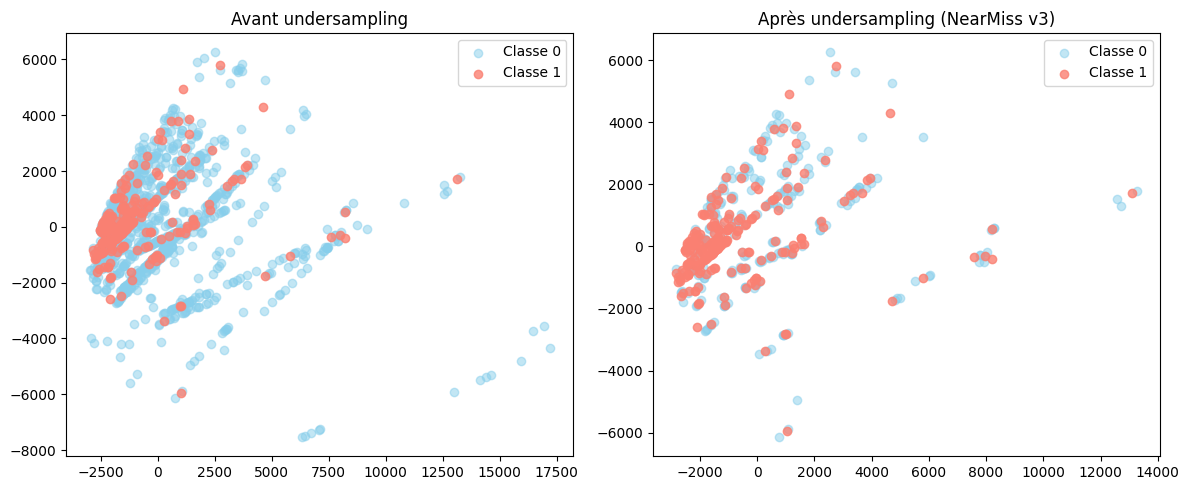

In [84]:
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Données : X (features), y (labels)

# Réduction en 2D pour visualisation
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Undersampling avec NearMiss version 3
nm = NearMiss(version=3)
X_res, y_res = nm.fit_resample(X, y)
X_res_2D = pca.transform(X_res)

# Tracé
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Avant undersampling
axs[0].scatter(X_2D[y == 0, 0], X_2D[y == 0, 1], label='Classe 0', alpha=0.5, c='skyblue')
axs[0].scatter(X_2D[y == 1, 0], X_2D[y == 1, 1], label='Classe 1', alpha=0.8, c='salmon')
axs[0].set_title("Avant undersampling")
axs[0].legend()

# Après undersampling (NearMiss v3)
axs[1].scatter(X_res_2D[y_res == 0, 0], X_res_2D[y_res == 0, 1], label='Classe 0', alpha=0.5, c='skyblue')
axs[1].scatter(X_res_2D[y_res == 1, 0], X_res_2D[y_res == 1, 1], label='Classe 1', alpha=0.8, c='salmon')
axs[1].set_title("Après undersampling (NearMiss v3)")
axs[1].legend()

plt.tight_layout()
plt.show()

## V- Comparaison des résultats avant et après undersampling

|**AVANT UNDERSAMPLING**   | Regréssion logistique| Random Forest         | XGBoost              |
| ------------------------ | -------------------- | --------------------- | ---------------------|
| **Critère**              | **Train_test_split** | **Train_test_split**  | **Train_test_split** |
| Accuracy                 | 0.74                 | 0.81                  | 0.85                 |
| Recall classe 1          | 0.40                 | 0.63                  | 0.33                 |
| Precision classe 1       | 0.74                 | 0.44                  | 0.61                 |
| Recall classe 0 (restés) | 0.97                 | 0.84                  | 0.96                 |
|                          | **Cross validate**   | **Cross validate**    | **Cross validate**   |
| Accuracy                 | 0.89                 | 0.86                  | 0.88                 |
| Recall classe 1          | 0.44                 | 0.24                  | 0.40                 |
| Precision classe 1       | 0.80                 | 0.73                  | 0.73                 |
| Recall classe 0 (restés) | 0.98                 | 0.98                  | 0.97                 |
|**APRES UNDERSAMPLING**   |                      |                       |                      |
| **Critère**              |**RandomUndersampler**|**RandomUndersampler** |**RandomUndersampler**|
| Accuracy                 | 0.68                 | 0.71                  | 0.69                 |
| Recall classe 1          | 0.74                 | 0.67                  | 0.65                 |
| Precision classe 1       | 0.31                 | 0.33                  | 0.30                 |
| Recall classe 0 (restés) | 0.67                 | 0.72                  | 0.70                 |
|                          |**NearMiss Version 1**|**NearMiss Version 1** |**NearMiss Version 1**|
| Accuracy                 | 0.52                 | 0.44                  | 0.41                 |
| Recall classe 1          | 0.76                 | 0.72                  | 0.78                 |
| Precision classe 1       | 0.22                 | 0.19                  | 0.19                 |
| Recall classe 0 (restés) | 0.48                 | 0.38                  | 0.33                 |
|                          |**NearMiss Version 3**|**NearMiss Version 3** |**NearMiss Version 3**|
| Accuracy                 | 0.74                 | 0.73                  | 0.69                 |
| Recall classe 1          | 0.80                 | 0.72                  | 0.72                 |
| Precision classe 1       | 0.37                 | 0.35                  | 0.31                 |
| Recall classe 0 (restés) | 0.72                 | 0.74                  | 0.68                 |

🎯 Objectif du projet
Prédire efficacement les employés qui vont quitter l’entreprise.
🔍 Critère prioritaire : Recall de la classe 1 (ne pas rater ceux qui vont partir).


🧾 Interprétation des résultats

**⚪️ Avant undersampling**

Les modèles ont des accuracy globalement bonnes (> 0.80) mais cela cache le déséquilibre :
la classe majoritaire (restés) est prédite avec une très bonne performance, mais la classe 1 est mal détectée.

🔹 Logistic Regression :
Recall 1 = 0.40 ➝ meilleure que RF ou XGB ici.

Précision = 0.74 ➝ peu de faux positifs mais encore 60% de départs non détectés.

🔹 Random Forest :
Recall 1 = 0.63 ➝ le meilleur ici avant undersampling.

Précision faible = 0.44 ➝ beaucoup de faux positifs.

Bon équilibre accuracy / rappel classe 1.

🔹 XGBoost :
Très bon accuracy (0.85), bon recall 0 (0.96) ➝ il prédit surtout ceux qui restent.

Mais rappel classe 1 faible (0.33) ➝ pas adapté à notre objectif.

🧠 Conclusion avant undersampling :
➡️ Random Forest est le meilleur compromis avant undersampling pour détecter les départs (classe 1), malgré une précision faible.

**🔵 Après undersampling** 

🔹 RandomUnderSampler

Tous les modèles améliorent le recall classe 1 (entre 0.63 et 0.72).

Mais la précision chute fortement (~0.30), ce qui signifie plus de faux positifs.

Le modèle prédit mieux ceux qui quittent, mais au prix de fausses alertes.

🔹 Le Random Forest reste le plus équilibré avec recall 1 = 0.65 et précision 0.34.

🟣 NearMiss V1
Très haut recall classe 1 (0.74 à 0.80) ➝ très bon pour détecter les départs.

Mais très basse précision (0.18 à 0.23) ➝ beaucoup de faux positifs.

Accuracy très faible ➝ les modèles perdent en stabilité globale.

🧠 Cas extrême : on capte bien ceux qui partent, mais on "alerte" trop de faux départs.

🔵 NearMiss V3
Très bon recall classe 1 (0.67 à 0.74).

Précision classe 1 meilleure que V1 (~0.30–0.33).

Accuracy raisonnable (~0.70).

🧠 Bon compromis entre sensibilité (recall) et faux positifs (précision).


| **Méthode**            | Modèle                | Accuracy | Recall (Classe 1) | Precision (Classe 1) | Recall (Classe 0) |
| ---------------------- | --------------------- | -------- | ----------------- | -------------------- | ----------------- |
| 🔹 Avant undersampling | Régression logistique | 0.74     | 0.40              | 0.74                 | 0.97              |
|                        | Random Forest         | 0.81     | 0.63              | 0.44                 | 0.84              |
|                        | XGBoost               | 0.85     | 0.33              | 0.61                 | 0.96              |
| 🔻 RandomUnderSampler  | Régression logistique | 0.68     | 0.74              | 0.31                 | 0.67              |
|                        | Random Forest         | 0.71     | 0.67              | 0.33                 | 0.72              |
|                        | XGBoost               | 0.69     | 0.65              | 0.30                 | 0.70              |
| 🔻 NearMiss V1         | Régression logistique | 0.52     | 0.76              | 0.22                 | 0.48              |
|                        | Random Forest         | 0.44     | 0.72              | 0.19                 | 0.38              |
|                        | XGBoost               | 0.41     | 0.78              | 0.19                 | 0.33              |
| ✅ NearMiss V3         | **Random Forest**    | **0.73** | **0.72**          | **0.35**             | **0.74**          |
|                        | **Régression logistique**| **0.74**   | **0.80**        | **0.37**         | **0.72**              |
|                        | XGBoost               | 0.69     | 0.72              | 0.31                 | 0.68              |

✅ Choix du meilleur modèle selon l’objectif
| Critère                                     | Objectif                                                                                     | Modèle recommandé                    |
| ------------------------------------------- | -------------------------------------------------------------------------------------------- | ------------------------------------ |
| 🎯 Détecter ceux qui vont partir (classe 1) | **Maximiser le recall de la classe 1**, sans totalement sacrifier la précision et l’accuracy | ✅ **Random Forest avec NearMiss V3**  et **Régression logistique NearMiss V3**|



# ETAPE 5: OPTIMISATION 

## I- Features importances globale

In [85]:
data_encoded_3 = data_encoded_2.copy()
data_cible_encoded_3 = data_cible_encoded_2.copy()

### 1- Régression logistique 

#### a) Top 30 des features les plus importantes

Distribution après NearMiss V3 :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64

📊 Rapport de classification (jeu de test) :
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       231
           1       0.36      0.76      0.49        46

    accuracy                           0.74       277
   macro avg       0.65      0.75      0.66       277
weighted avg       0.84      0.74      0.77       277


🔍 Top 30 des variables les plus influentes :
                                      Feature  Coefficient
39                  heure_supplementaires_Oui     1.144006
55                             effort_vs_gain     1.132383
34              domaine_etude_Entrepreunariat     1.075810
18              frequence_deplacement_encoded     0.859345
53             heure_supp_niveau_hierarchique     0.678087
21                 statut_marital_Célibataire     0.550723
41                  ratio_distance_experience     0.5210

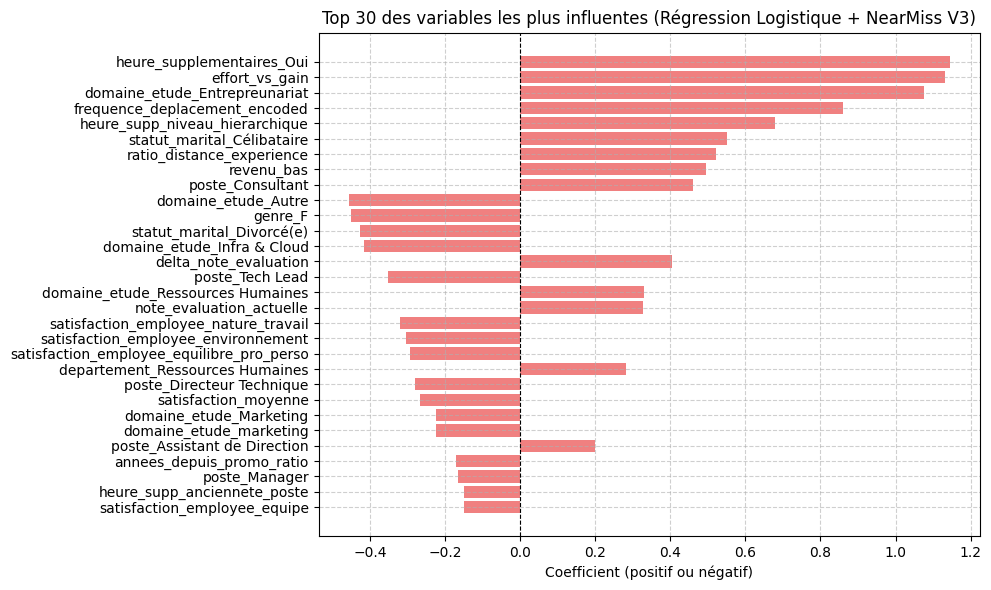

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss

# 1. Chargement des données
X = data_encoded_3
y = data_cible_encoded_3['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Undersampling avec NearMiss (version 3)
nearmiss = NearMiss(version=3)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# (Facultatif) Affichage de la distribution après undersampling
print("Distribution après NearMiss V3 :")
print(y_train_nm.value_counts())

# 4. Entraînement du modèle de régression logistique
logreg = LogisticRegression(
    max_iter=1000,  # Augmenté pour éviter les warnings de convergence
    solver='liblinear',  # Adapté aux petits jeux de données
    penalty='l2',
    random_state=42
)
logreg.fit(X_train_nm, y_train_nm)

# 5. Prédictions
y_train_pred = logreg.predict(X_train_nm)
y_test_pred = logreg.predict(X_test)

# 6. Évaluation
print("\n📊 Rapport de classification (jeu de test) :")
print(classification_report(y_test, y_test_pred))

# 7. Affichage des coefficients
coefs = logreg.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'AbsValue': np.abs(coefs)
}).sort_values(by='AbsValue', ascending=False)

# 8. Affichage tabulaire
print("\n🔍 Top 30 des variables les plus influentes :")
print(coef_df[['Feature', 'Coefficient']].head(30))

# 9. Affichage graphique
plt.figure(figsize=(10, 6))
plt.barh(
    coef_df['Feature'].head(30),
    coef_df['Coefficient'].head(30),
    color='lightcoral'
)
plt.xlabel('Coefficient (positif ou négatif)')
plt.title('Top 30 des variables les plus influentes (Régression Logistique + NearMiss V3)')
plt.axvline(x=0, color='black', lw=0.8, linestyle='--')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### b) Features qui expliquent 95% de la variance

In [87]:
import numpy as np
import pandas as pd

# 1. Récupération des coefficients
coefficients = logreg.coef_[0]  # logreg est ton modèle entraîné
feature_names = X.columns  # Ou X_train_resampled.columns si différent

# 2. Création d'un DataFrame des importances (valeurs absolues des coefficients)
feature_importance_df_2 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

# 3. Tri par importance décroissante
feature_importance_df_2 = feature_importance_df_2.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# 4. Ajout de la colonne d’importance cumulée (normalisée à 1)
feature_importance_df_2['Cumulative_Importance'] = feature_importance_df_2['Importance'].cumsum() / feature_importance_df_2['Importance'].sum()

# 5. Sélection des variables qui expliquent 95 % de l’importance cumulée
important_features_95_2 = feature_importance_df_2[feature_importance_df_2['Cumulative_Importance'] <= 0.95]

# 6. Affichage
print("\n✅ Features représentant 95% de l'importance cumulée (Logistic Regression) :")
print(important_features_95_2)

print(f"\nNombre de features sélectionnées : {important_features_95_2.shape[0]}")



✅ Features représentant 95% de l'importance cumulée (Logistic Regression) :
                                      Feature  Importance  \
0                   heure_supplementaires_Oui    1.144006   
1                              effort_vs_gain    1.132383   
2               domaine_etude_Entrepreunariat    1.075810   
3               frequence_deplacement_encoded    0.859345   
4              heure_supp_niveau_hierarchique    0.678087   
5                  statut_marital_Célibataire    0.550723   
6                   ratio_distance_experience    0.521066   
7                                  revenu_bas    0.494894   
8                            poste_Consultant    0.459720   
9                         domaine_etude_Autre    0.457565   
10                                    genre_F    0.451224   
11                  statut_marital_Divorcé(e)    0.426674   
12                domaine_etude_Infra & Cloud    0.416434   
13                      delta_note_evaluation    0.404465   
14      

#### c) Graphique du pourçantage de la variance en fonction du nombre de features

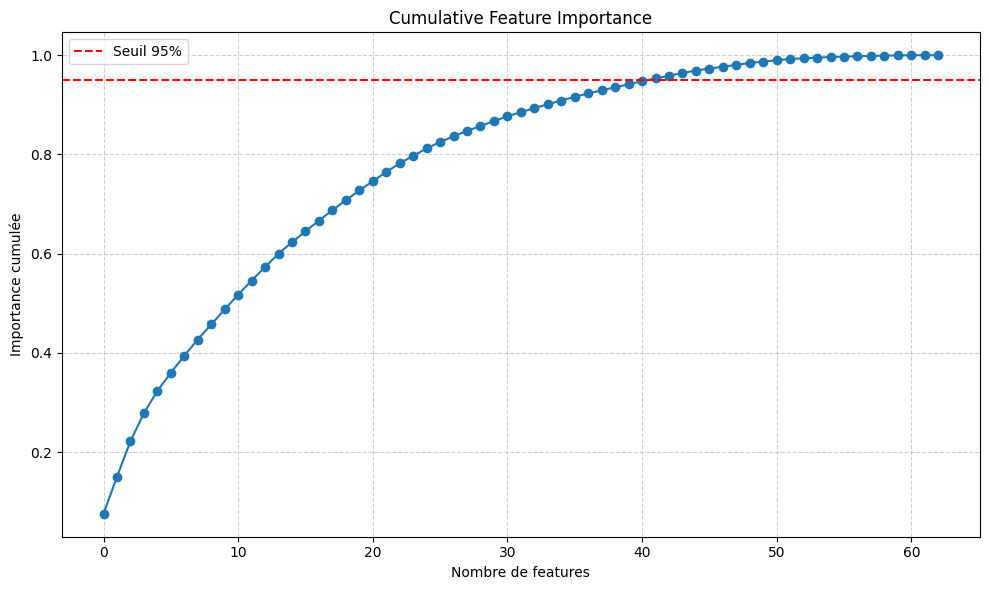

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df_2['Cumulative_Importance'], marker='o', linestyle='-')
plt.axhline(y=0.95, color='red', linestyle='--', label='Seuil 95%')
plt.xlabel('Nombre de features')
plt.ylabel('Importance cumulée')
plt.title('Cumulative Feature Importance')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### 2- Random Forest classifier

#### a) Top 30 des features les plus importantes

Distribution après NearMiss V3 :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64

🔍 Top 30 des features les plus importantes :
                                 Feature  Importance
52      heure_supp_par_taux_augmentation    0.082264
16                            revenu_log    0.080399
53        heure_supp_niveau_hierarchique    0.074047
48                      revenu_par_poste    0.065916
49                     taux_augmentation    0.062514
51                    experience_stagnee    0.058200
41             ratio_distance_experience    0.053930
55                        effort_vs_gain    0.043687
50              ecart_revenu_moyen_poste    0.037951
43                  satisfaction_moyenne    0.035916
40                  ratio_experience_age    0.033999
2                annee_experience_totale    0.033304
39             heure_supplementaires_Oui    0.026685
46                      score_engagement    0.023463
19                anciennete_cat_encoded    0.

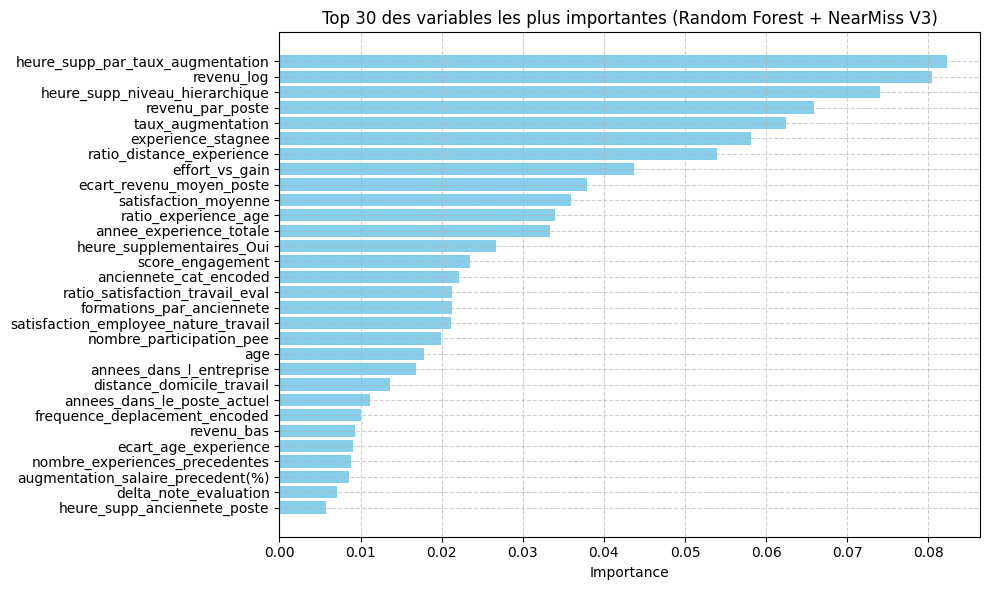

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss  # 👈 Import NearMiss

# 1. Chargement des données
X = data_encoded_2
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# 2. Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Undersampling avec NearMiss (version 3)
nearmiss = NearMiss(version=3)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# (Facultatif) Affichage de la distribution après undersampling
print("Distribution après NearMiss V3 :")
print(y_train_nm.value_counts())

# 4. Entraînement du modèle
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=42
)
rfc.fit(X_train_nm, y_train_nm)

# 5. Prédictions
y_train_pred = rfc.predict(X_train_nm)
y_test_pred = rfc.predict(X_test)

# 6. Importance des variables
importances = rfc.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 7. Affichage tabulaire
print("\n🔍 Top 30 des features les plus importantes :")
print(feature_importance_df.head(30))

# 8. Affichage graphique
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'].head(30),
    feature_importance_df['Importance'].head(30),
    color='skyblue'
)
plt.xlabel('Importance')
plt.title('Top 30 des variables les plus importantes (Random Forest + NearMiss V3)')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### b) Features qui expliquent 95% de la variance

In [90]:
# Tri des features par importance décroissante (déjà fait)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Ajout de la colonne cumulée
feature_importance_df['Cumulative_Importance'] = feature_importance_df['Importance'].cumsum()

# Sélection des features qui expliquent au moins 80% de l’importance cumulée
important_features_95 = feature_importance_df[feature_importance_df['Cumulative_Importance'] <= 0.95]

print("\n✅ Features représentant 95% de l'importance cumulée :")
print(important_features_95)

# Nombre de features retenues
print(f"\nNombre de features sélectionnées : {important_features_95.shape[0]}")


✅ Features représentant 95% de l'importance cumulée :
                                      Feature  Importance  \
0            heure_supp_par_taux_augmentation    0.082264   
1                                  revenu_log    0.080399   
2              heure_supp_niveau_hierarchique    0.074047   
3                            revenu_par_poste    0.065916   
4                           taux_augmentation    0.062514   
5                          experience_stagnee    0.058200   
6                   ratio_distance_experience    0.053930   
7                              effort_vs_gain    0.043687   
8                    ecart_revenu_moyen_poste    0.037951   
9                        satisfaction_moyenne    0.035916   
10                       ratio_experience_age    0.033999   
11                    annee_experience_totale    0.033304   
12                  heure_supplementaires_Oui    0.026685   
13                           score_engagement    0.023463   
14                     ancienn

On a donc 32 features qui expliquent 95% de la variance (soit à peu près la moitié des features totals qui est de 63)

#### c) Graphique du pourçantage de la variance en fonction  du nombre de features 

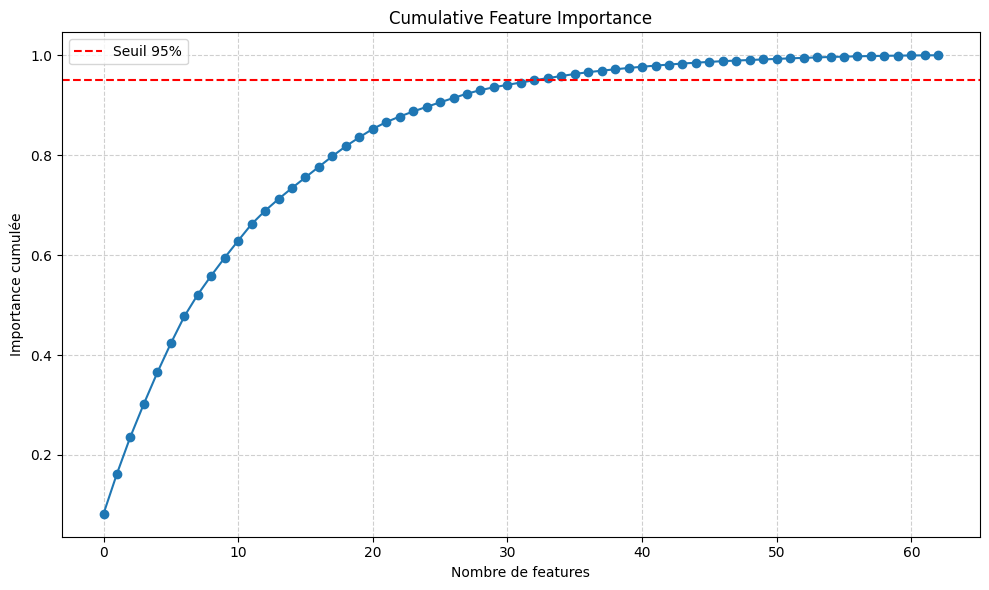

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df['Cumulative_Importance'], marker='o', linestyle='-')
plt.axhline(y=0.95, color='red', linestyle='--', label='Seuil 95%')
plt.xlabel('Nombre de features')
plt.ylabel('Importance cumulée')
plt.title('Cumulative Feature Importance')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Le point de contact entre la courbe et la ligne de seuil 95 est bien situé à 32 features

## II- Entrainement du modèle sur les features importance et comparaison

### 1- Entrainement sur la régression logistique undersampling NearMiss V3

In [92]:
important_features_95_2_columns = important_features_95_2['Feature'].tolist()  # Liste des features retenues pour 90% de l'importance cumulée

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# --- 1. Préparation des données ---
X = data_encoded_3[important_features_95_2_columns]
y = data_cible_encoded_3['a_quitte_l_entreprise(Oui=1, Non=0)']

# --- 2. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 3. Undersampling avec NearMiss version 3 (uniquement sur TRAIN) ---
nm = NearMiss(version=3)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📈 Après NearMiss (v3) undersampling :")
print(y_train_resampled.value_counts())

# --- 4. Entraînement du modèle (Régression Logistique) ---
logreg = LogisticRegression(
    solver='liblinear',  # ou 'saga' si tu as beaucoup de features
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur TEST (données réelles) ---
y_test_pred = logreg.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 6. Évaluation sur TRAIN (undersampled) ---
y_train_pred = logreg.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled - NearMiss v3) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après NearMiss (v3) undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64

📕 Résultats sur TEST (données réelles) :
[[166  65]
 [ 12  34]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       231
           1       0.34      0.74      0.47        46

    accuracy                           0.72       277
   macro avg       0.64      0.73      0.64       277
weighted avg       0.83      0.72      0.75       277


📘 Résultats sur TRAIN (undersampled - NearMiss v3) :
[[133  50]
 [ 49 134]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       183
           1       0.73      0.73      0.73       183

    accuracy                           0.73       366
   macro avg       0.73      0.73      0.73       366
weighted avg       0.73      0.73    

### 2- Entrainement avec Random Forest (undersampling NearMiss Version 3)

In [94]:
important_features_95_columns = important_features_95['Feature'].tolist()  # Liste des features retenues pour 90% de l'importance cumulée

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

X = data_encoded_2[important_features_95_columns]
y = data_cible_encoded_2['a_quitte_l_entreprise(Oui=1, Non=0)']

# --- 1. Split des données originales ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("📈 Avant undersampling :")
print(y_train.value_counts())

# --- 2. Undersampling avec NearMiss version 3 sur TRAIN uniquement ---
nm = NearMiss(version=3)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

print("📈 Après NearMiss (v3) undersampling :")
print(y_train_resampled.value_counts())

# --- 3. Entraînement du modèle ---
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# --- 5. Évaluation sur TEST (données réelles) ---
y_test_pred = rfc.predict(X_test)
print("\n📕 Résultats sur TEST (données réelles) :")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# --- 4. Évaluation sur TRAIN (undersampled) ---
y_train_pred = rfc.predict(X_train_resampled)
print("\n📘 Résultats sur TRAIN (undersampled - NearMiss v3) :")
print(confusion_matrix(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))


📈 Avant undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    923
1    183
Name: count, dtype: int64
📈 Après NearMiss (v3) undersampling :
a_quitte_l_entreprise(Oui=1, Non=0)
0    183
1    183
Name: count, dtype: int64

📕 Résultats sur TEST (données réelles) :
[[159  72]
 [ 12  34]]
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       231
           1       0.32      0.74      0.45        46

    accuracy                           0.70       277
   macro avg       0.63      0.71      0.62       277
weighted avg       0.83      0.70      0.73       277


📘 Résultats sur TRAIN (undersampled - NearMiss v3) :
[[183   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       183

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00    

## III- Comparaison de résultats sur les features importances

|**TOUTES LES FEATURES**   | Random Forest         | Régression logistique |
| ------------------------ | --------------------- | --------------------- |
|                          |**NearMiss Version 3** |**NearMiss Version 3** |
| Accuracy                 | 0.73                  | 0.74                  |
| Recall classe 1          | 0.72                  | 0.80                  |
| Precision classe 1       | 0.35                  | 0.37                  |
| Recall classe 0          | 0.74                  | 0.72                  |
|**FEATURES IMPORTANCES**  |                       |                       |
|                          |**NearMiss Version 3** |**NearMiss Version 3** |
| Accuracy                 | 0.70                  | 0.72                  |
| Recall classe 1          | 0.74✅                | 0.74❌               |
| Precision classe 1       | 0.32❌                | 0.34❌               |
| Recall classe 0          | 0.69                  | 0.72                  |

**✅ Ce qu’on en tire :**

**Random Forest classifier (undersampling nearmiss V3)**

- Accuracy baisse légèrement en ne gardant que les variables importantes, ce qui est attendu (moins d’information).
- Recall classe 1 augmente légèrement (0.74 vs 0.72) ➜ le modèle détecte un peu plus de vrais partants avec les variables importantes, **ce qui est positif pour notre objectif**.
- Precision classe 1 diminue (0.32 vs 0.35) ➜ le modèle génère un peu plus de faux positifs.
- Recall classe 0 diminue (0.69 vs 0.74) ➜ le modèle détectes un peu moins bien les personnes qui restent.
- Avec la moitié des features on a une meilleur prédiction des démissionnaires de l'entreprise

**Régression logistique (undersampling nearmiss V3)**

- Tous les scores sont en baisse, sauf le rappel classe 0 qui reste inchangé (mais ça ne nous interresse pas)
- Travailler avec uniquement les feature importances est moins productif sur ce modèle

## III- SHAP

### 1- Obeservations générales

In [183]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Shape of SHAP values: (277, 32, 2)
Shape of X_test: (277, 32)


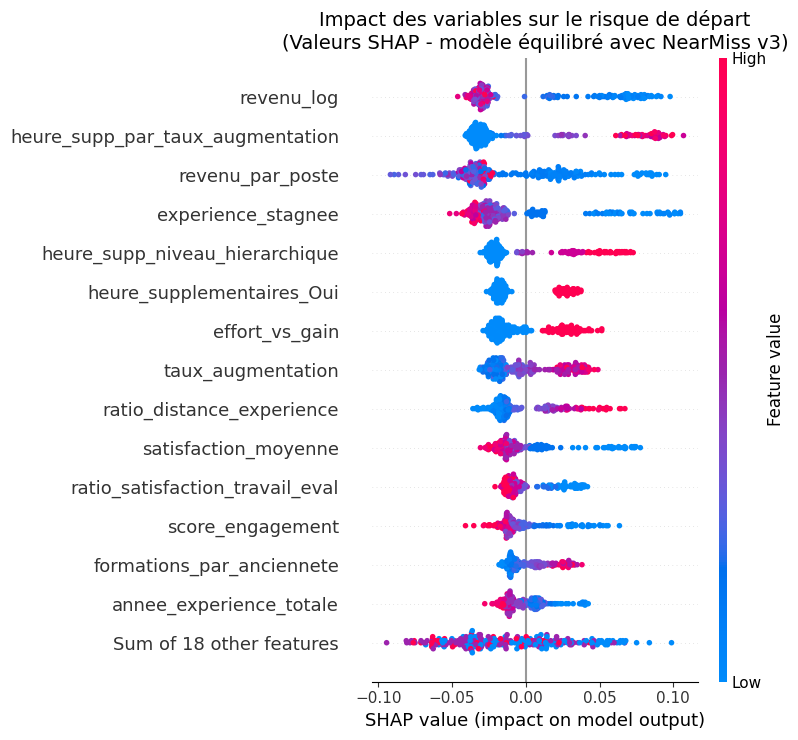

In [184]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss

# 0. Application de NearMiss v3
nm = NearMiss(version=3)
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

# 1. Entraînement du modèle sur les données rééquilibrées
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rfc.fit(X_resampled, y_resampled)

# 2. Calcul des valeurs SHAP
explainer = shap.TreeExplainer(rfc)
shap_values = explainer(X_test)

# 3. Vérification des dimensions
print(f"Shape of SHAP values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# 4. Configuration du plot
plt.figure(figsize=(12, 8))

# 5. Génération du plot SHAP (version moderne)
shap.plots.beeswarm(shap_values[:, :, 1],  # Pour la classe positive
                    show=False,
                    max_display=15)  # Limite à 15 variables les plus importantes

# 6. Personnalisation
plt.title("Impact des variables sur le risque de départ\n(Valeurs SHAP - modèle équilibré avec NearMiss v3)", fontsize=14)
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()


🧠 Comment lire le graphique SHAP

Axe vertical : les variables/features utilisées par le modèle.

Axe horizontal : la valeur SHAP (impact de la variable sur la prédiction).

➕ à droite : la variable augmente la probabilité de départ (classe 1).

➖ à gauche : la variable réduit la probabilité de départ (donc favorise la classe 0 = rester).

Couleurs (valeur de la variable) :

🔴 = valeur élevée de la variable

🔵 = valeur faible de la variable

**🔎 Quelques observations :**

- revenu_par_poste et revenu_log : des revenus plus faibles (en bleu à droite) augmentent le risque de départ.

- heure_supp_niveau_hierarchique et heure_supp_par_taux_augmentation : un volume élevé d'heure (en rouge à droite) semble aussi lié à un plus fort risque de départ.

- ratio_distance_experience: un employé recent et à distance élevé du lieu de travail a un risque de départ élevé (en rouge à droite)

- experience_stagnee : facteur de risque évident (valeurs rouge =  droite = reste). Le employée qui ont durée dans une entreprise auront tendance à moins démissionner que ceux qui ont moins durés

- satisfaction_moyenne, ratio_satisfaction_travail_eval, score_engagement: plus ces scores sont faible (bleu à droite), plus le risque de départ est élevé


Contrairement à ce qu'on aurait prédit par intuition: 


- taux_augmentation : un taux d'augmentation plus élevé n'est pas toujours signe d'envie de s'engager plus longtemps avec l'entreprise

- formations_par_anciennete: un employé ayant suivie beaucoup de formation risque plus de démissionner (par excès de confiance (connaissance) ? Ou trop de responsabilité ?)

### 2- Obeservations locales

#### a) Shap Waterfall sur le train

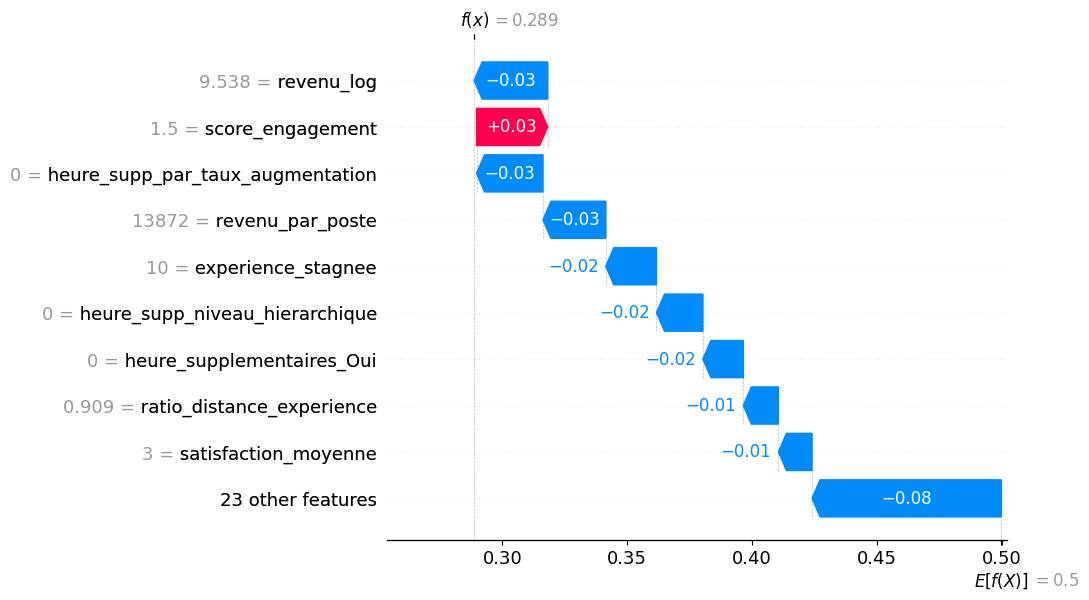

In [185]:
# 1.1 Sélection d’un individu à expliquer (dans le jeu d'entraînement rééquilibré)
index_train = 0  # Choix d'un index pour l'individu à expliquer

# 1.2 Calcul des valeurs SHAP sur X_resampled
shap_values_train = explainer(X_resampled)

# 1.3 Affichage du graphique waterfall pour la classe 1 (départ)
shap.plots.waterfall(shap_values_train[index_train, :, 1])


**🧠 Lecture du graphique SHAP Waterfall**

➤ Axe horizontal : probabilité de départ prédite

- En bas à droite : E[f(x)] = 0.5 → la valeur moyenne de prédiction du modèle sur l’ensemble des individus (base rate).
- En haut : f(x) = 0.289 → la prédiction finale du modèle pour cet individu : 28.9 % de probabilité de départ.

➤ Interprétation :

Le modèle partait de 50 % de chance de départ (moyenne globale), et les variables ont globalement fait baisser cette probabilité à 28.9 %, donc le modèle pense que l'individu 0 des variables de train ne va pas démissionner, il s'appui notamment sur:
- ses revenu (probablement très élevé au vu de l'impact générale des revenu vu précédement), converti en valeur réelle on est sur 13882.47€
- le fait qu'il n'est pas d'heures supplémentaire
- son expérience stagnante élevé, donc peut d'expérience diversifié, il a probablement déjà durée dans cette entreprise actuelle
- sa satisfaction moyenne de 3 probablement élevée
et ainsi de suite

#### b) Shap Waterfall sur le test

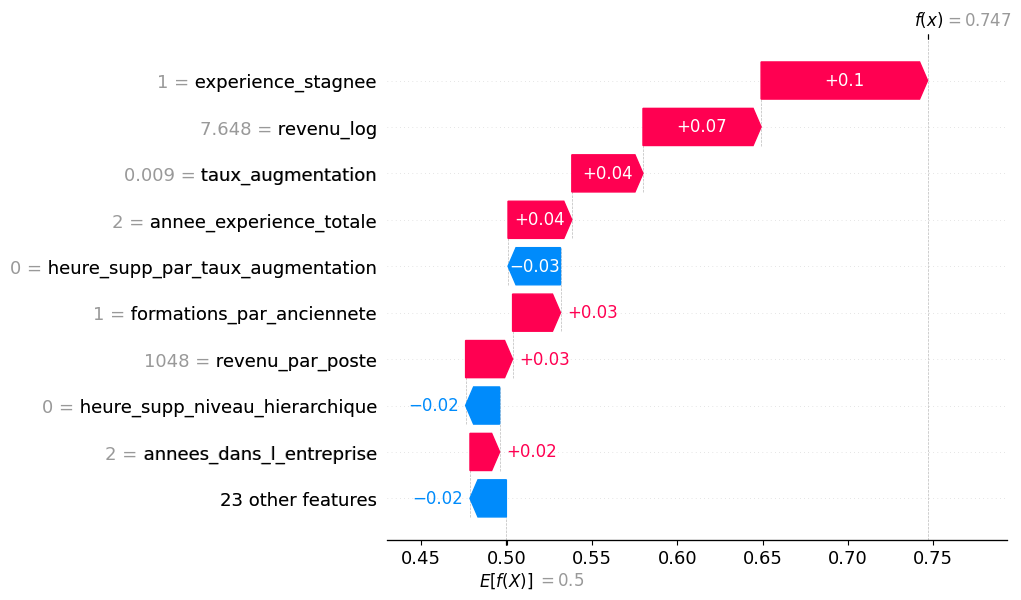

In [186]:
# 2.1 Sélection d’un individu à expliquer (dans le jeu de test)
index_test = 0  # Choix d'un index pour l'individu à expliquer dans le test

# 2.2 Déjà calculé plus tôt : shap_values = explainer(X_test)

# 2.3 Affichage du graphique waterfall pour la classe 1 (départ)
shap.plots.waterfall(shap_values[index_test, :, 1])


➤ Interprétation : sur l'individu de l'index 0 des données de test
Le modèle part du principe qu'il a 50% de chance de partir de l'entreprise, cependant après toutes les influences des features, il prédit une démission, notamment :

- une faible expérience stagnée: contrairement à l'individu précédent, il a une faible expérience stagnée, donc ne dure pas très longtemps en général dans le entreprise
- le niveau de revenu converti en valeur réelle on est sur environ 2096€ qui correspond certainement à un faible revenu
- revenu par poste 1048€ on est surement être sur un poste à faible revenu
- peu d'année d'expérience 